Study of parameter $\eta(t)$

In [20]:
# Different choices for eta(t)

# Computes the inverse of the noise as a function of time t.
# It returns a tuple (val,descr) where 'val' is a float representing the value computed and 'descr' is a string useful to describe how the function works.

def inv_noise__costantSmall1(t=0):
    k = 0.1
    return k, str(k)

def inv_noise__costantSmall2(t=0):
    k = 0.01
    return k, str(k)

def inv_noise__costantSmall3(t=0):
    k = 0.001
    return k, str(k)

def inv_noise__costantSmall4(t=0):
    k = 0.0001
    return k, str(k)

def inv_noise__costantSmallZero(t=0):
    k = 1e-9
    return k, str(k)

def inv_noise__costantLarge1(t=0):
    k = 1
    return k, str(k)

def inv_noise__costantLarge2(t=0):
    k = 2
    return k, str(k)

def inv_noise__costantLarge3(t=0):
    k = 5
    return k, str(k)

def inv_noise__costantLarge4(t=0):
    k = 10
    return k, str(k)

def inv_noise__costantLarge5(t=0):
    k = 100
    return k, str(k)

def inv_noise__costantLargePlusInf(t=0):
    k = 200 # e^k smaller than the smallest positive possible value storable in a numpy array for higher values of k
    return k, str(k)

def inv_noise__increasingLinear(t=0):
    return t/100, 't/100'

def inv_noise__increasingQuadratic(t=0):
    return (t**2)/5000, 't^2/5000'

def inv_noise__increasingSquareRoot(t=0):
    return np.sqrt(t)/100, '\sqrt{t}/100'

etas = [inv_noise__increasingLinear, inv_noise__increasingQuadratic, inv_noise__increasingSquareRoot, inv_noise__costantSmall1, inv_noise__costantSmall2, inv_noise__costantSmall3, inv_noise__costantSmall4, inv_noise__costantSmallZero, inv_noise__costantLarge1, inv_noise__costantLarge2, inv_noise__costantLarge3, inv_noise__costantLarge4, inv_noise__costantLarge5, inv_noise__costantLargePlusInf]

In [21]:
initial_configuration = rd.choices(list(C.keys()), k=len(G)) # random initial configuration, same for all simulations
t_final = 1000

Inverse noise $\eta(t) = t/100$

	Final potential = 4.0
	Minimum potential = 4.0
	Maximum potential = 73.0
	Avrage potential = 13.815184815184816




Inverse noise $\eta(t) = t^2/5000$

	Final potential = 4.0
	Minimum potential = 4.0
	Maximum potential = 73.0
	Avrage potential = 11.028971028971029




Inverse noise $\eta(t) = \sqrt{t}/100$

	Final potential = 46.0
	Minimum potential = 36.0
	Maximum potential = 73.0
	Avrage potential = 48.726273726273725




Inverse noise $\eta(t) = 0.1$

	Final potential = 54.0
	Minimum potential = 44.0
	Maximum potential = 79.0
	Avrage potential = 59.4995004995005




Inverse noise $\eta(t) = 0.01$

	Final potential = 78.0
	Minimum potential = 47.0
	Maximum potential = 82.0
	Avrage potential = 65.35564435564436




Inverse noise $\eta(t) = 0.001$

	Final potential = 75.0
	Minimum potential = 48.0
	Maximum potential = 104.0
	Avrage potential = 69.38061938061938




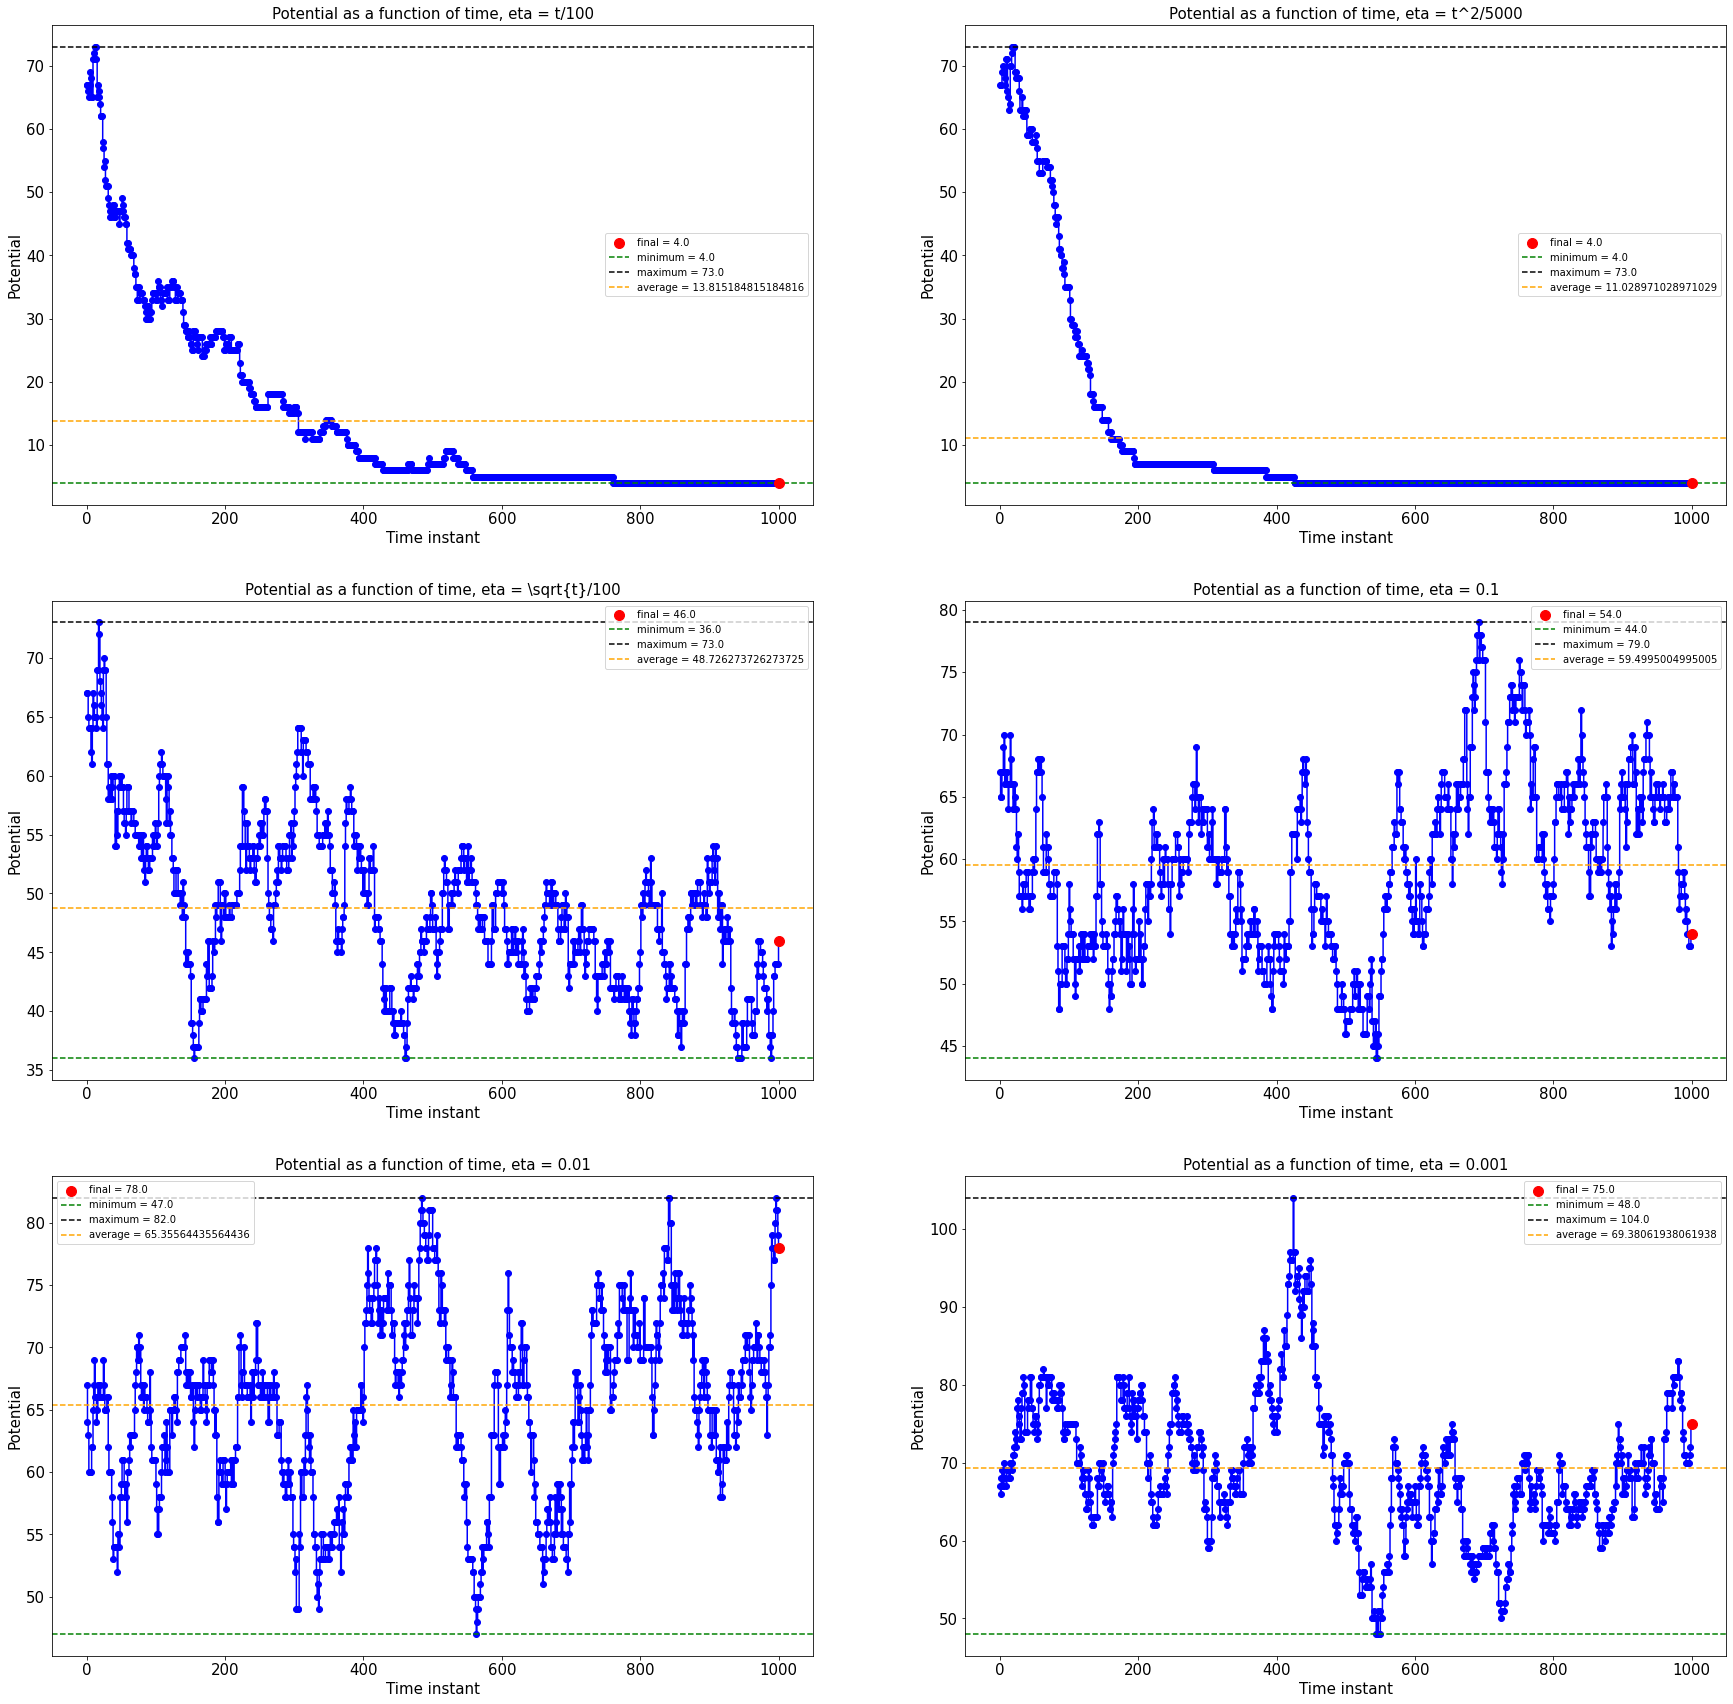

In [22]:
C_rev = dict((v,k) for k,v in C.items())
fig = plt.figure(figsize=(30, 30))
plot_counter = 1
for eta in etas[:6]:
    printmd("Inverse noise $\eta(t) = " + eta()[1] + "$")
    states, t_final = simulate(C, W, initial_configuration, eta, cost, t_final = t_final, termination = 'time')

    potentials = []
    for t in range(0,t_final+1):
        x = states[t]
        pot = potential(x, W, cost)
        potentials.append(pot)

    
    plt.subplot(3,2,plot_counter)
    plot_counter += 1
    plt.step(potentials, 'bo-', where="post")
    last = potentials[-1]
    plt.scatter(x = t_final, y = last, color = 'r', zorder = 5, s = 100, label='final = ' + str(last))
    minimum = min(potentials)
    plt.axhline(y = minimum, color = 'g', linestyle = 'dashed', label='minimum = ' + str(minimum))
    maximum = max(potentials)
    plt.axhline(y = maximum, color = 'black', linestyle = 'dashed', label='maximum = ' + str(maximum))
    average = np.mean(np.mean(potentials))
    plt.axhline(y = average, color = 'orange', linestyle = 'dashed', label='average = ' + str(average))

    plt.title('Potential as a function of time, eta = ' + eta()[1], fontsize = 15)
    plt.xlabel('Time instant', fontsize = 15)
    plt.ylabel('Potential', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.legend(fontsize = 10)
    
    
    print("\tFinal potential =", last)
    print("\tMinimum potential =", minimum)
    print("\tMaximum potential =", maximum)
    print("\tAvrage potential =", average)
    print("\n")
    
fig.savefig(img_dir + 'img ' + str(img_counter) + '.' + image_format, format=image_format)
img_counter += 1

Inverse noise $\eta(t) = 0.0001$

	Final potential = 72.0
	Minimum potential = 52.0
	Maximum potential = 88.0
	Avrage potential = 69.37462537462538




Inverse noise $\eta(t) = 1e-09$

	Final potential = 51.0
	Minimum potential = 47.0
	Maximum potential = 82.0
	Avrage potential = 60.243756243756245




Inverse noise $\eta(t) = 1$

	Final potential = 39.0
	Minimum potential = 19.0
	Maximum potential = 67.0
	Avrage potential = 30.038961038961038




Inverse noise $\eta(t) = 2$

	Final potential = 13.0
	Minimum potential = 9.0
	Maximum potential = 67.0
	Avrage potential = 17.093906093906092




Inverse noise $\eta(t) = 5$

	Final potential = 6.0
	Minimum potential = 5.0
	Maximum potential = 67.0
	Avrage potential = 9.570429570429571




Inverse noise $\eta(t) = 10$

	Final potential = 4.0
	Minimum potential = 4.0
	Maximum potential = 67.0
	Avrage potential = 7.280719280719281




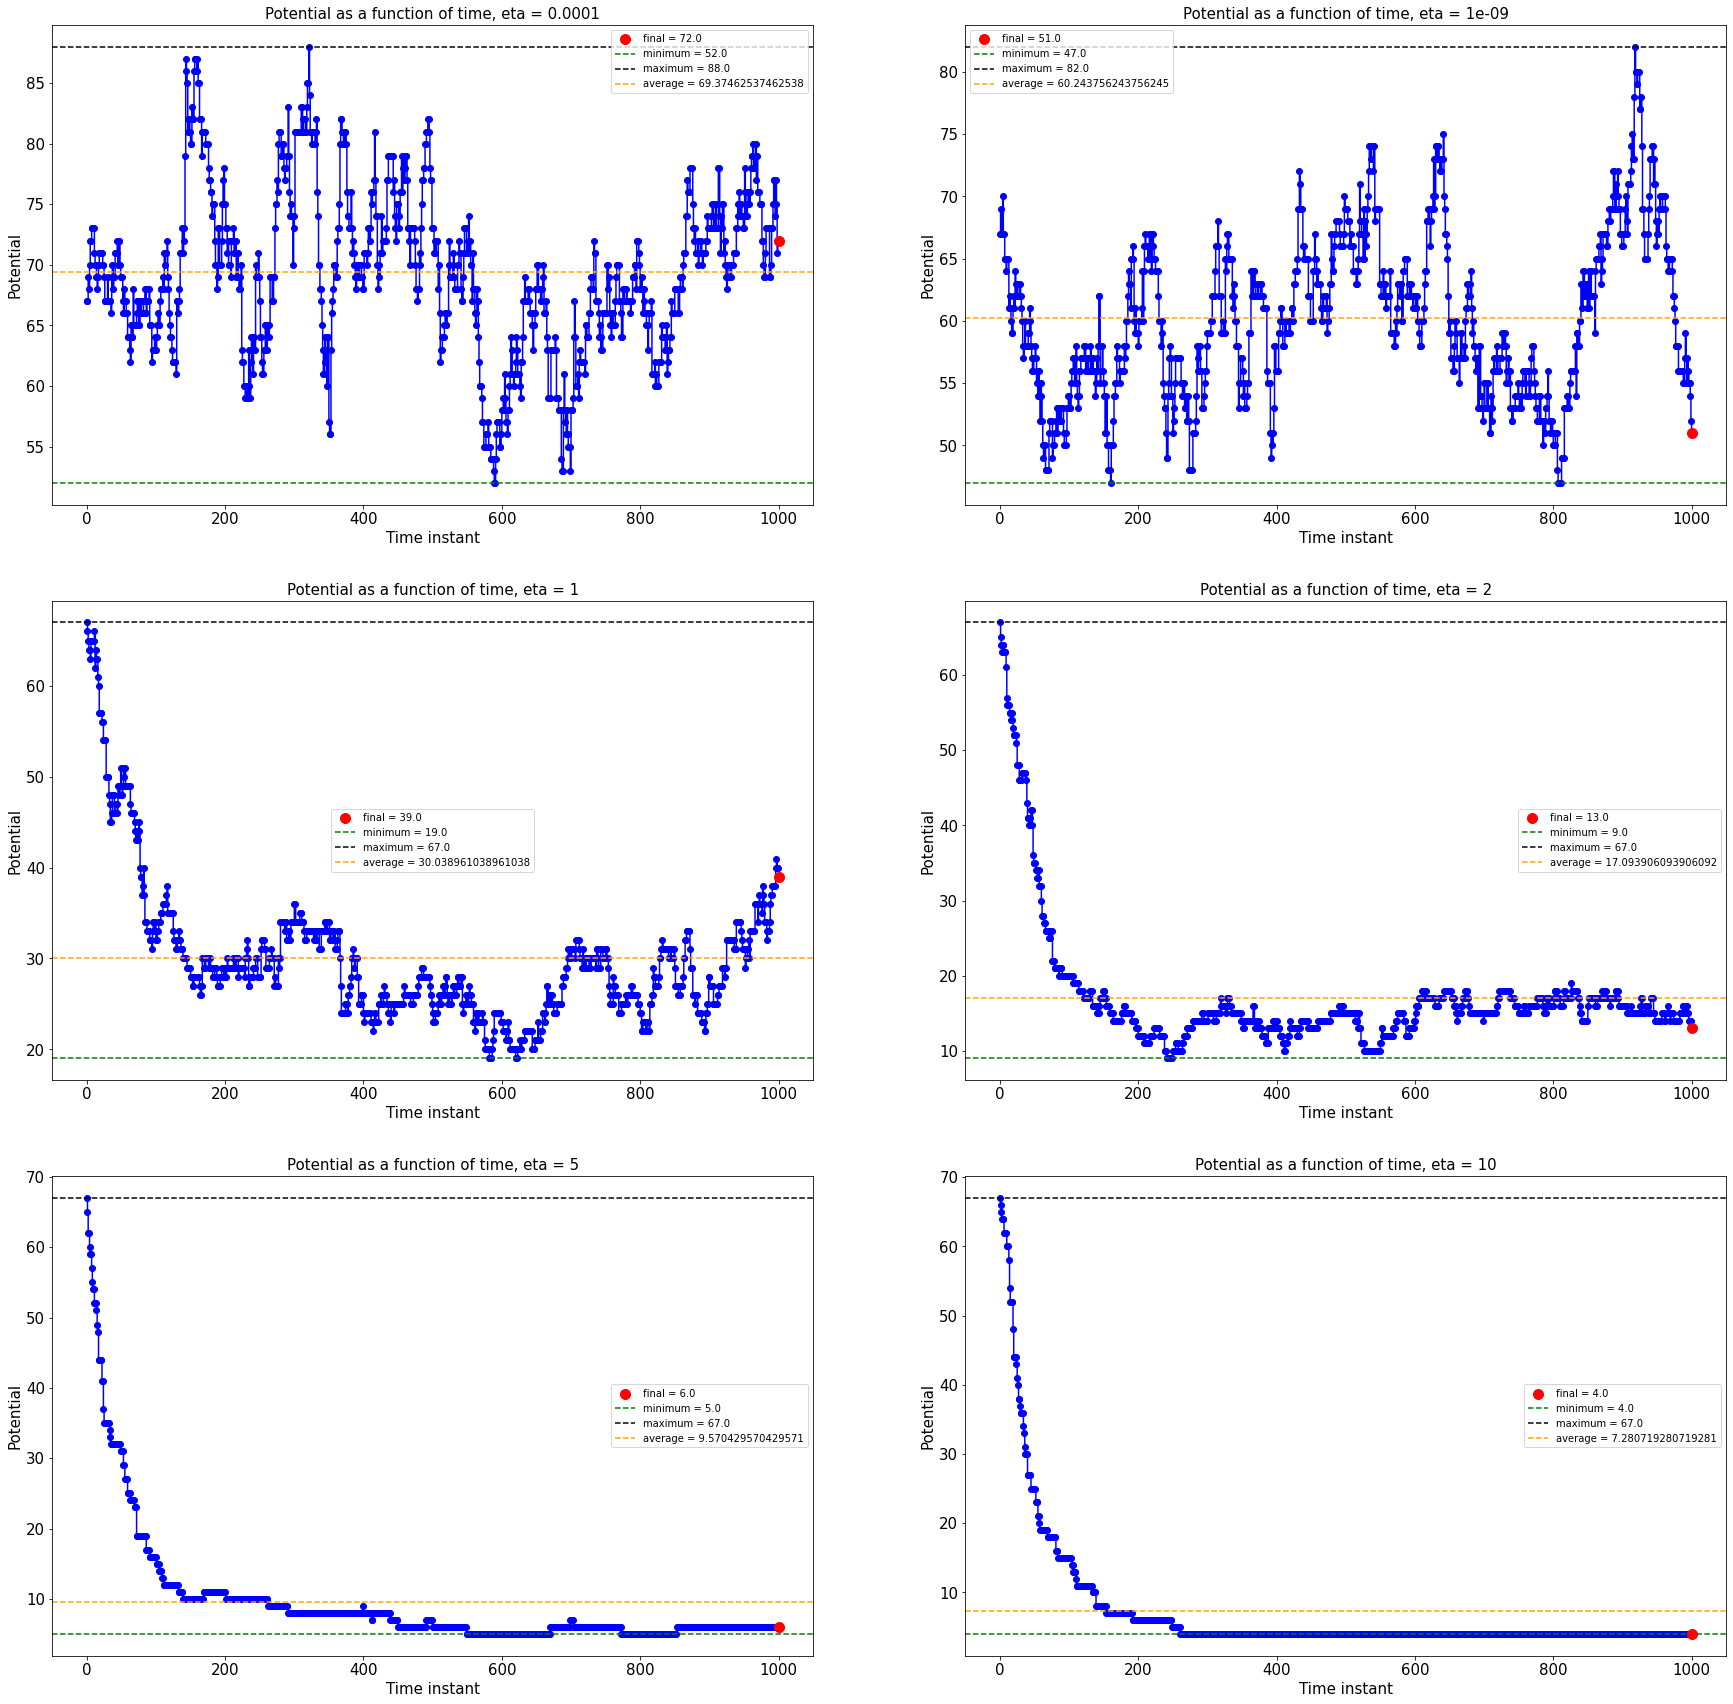

In [23]:
C_rev = dict((v,k) for k,v in C.items())
fig = plt.figure(figsize=(30, 30))
plot_counter = 1
for eta in etas[6:12]:
    printmd("Inverse noise $\eta(t) = " + eta()[1] + "$")
    states, t_final = simulate(C, W, initial_configuration, eta, cost, t_final = t_final, termination = 'time')

    potentials = []
    for t in range(0,t_final+1):
        x = states[t]
        pot = potential(x, W, cost)
        potentials.append(pot)

    
    plt.subplot(3,2,plot_counter)
    plot_counter += 1
    plt.step(potentials, 'bo-', where="post")
    last = potentials[-1]
    plt.scatter(x = t_final, y = last, color = 'r', zorder = 5, s = 100, label='final = ' + str(last))
    minimum = min(potentials)
    plt.axhline(y = minimum, color = 'g', linestyle = 'dashed', label='minimum = ' + str(minimum))
    maximum = max(potentials)
    plt.axhline(y = maximum, color = 'black', linestyle = 'dashed', label='maximum = ' + str(maximum))
    average = np.mean(np.mean(potentials))
    plt.axhline(y = average, color = 'orange', linestyle = 'dashed', label='average = ' + str(average))

    plt.title('Potential as a function of time, eta = ' + eta()[1], fontsize = 15)
    plt.xlabel('Time instant', fontsize = 15)
    plt.ylabel('Potential', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.legend(fontsize = 10)
    
    
    print("\tFinal potential =", last)
    print("\tMinimum potential =", minimum)
    print("\tMaximum potential =", maximum)
    print("\tAvrage potential =", average)
    print("\n")
    
fig.savefig(img_dir + 'img ' + str(img_counter) + '.' + image_format, format=image_format)
img_counter += 1

Inverse noise $\eta(t) = 100$

	Final potential = 5.0
	Minimum potential = 5.0
	Maximum potential = 67.0
	Avrage potential = 7.969030969030969




Inverse noise $\eta(t) = 200$

	Final potential = 4.0
	Minimum potential = 4.0
	Maximum potential = 67.0
	Avrage potential = 8.692307692307692




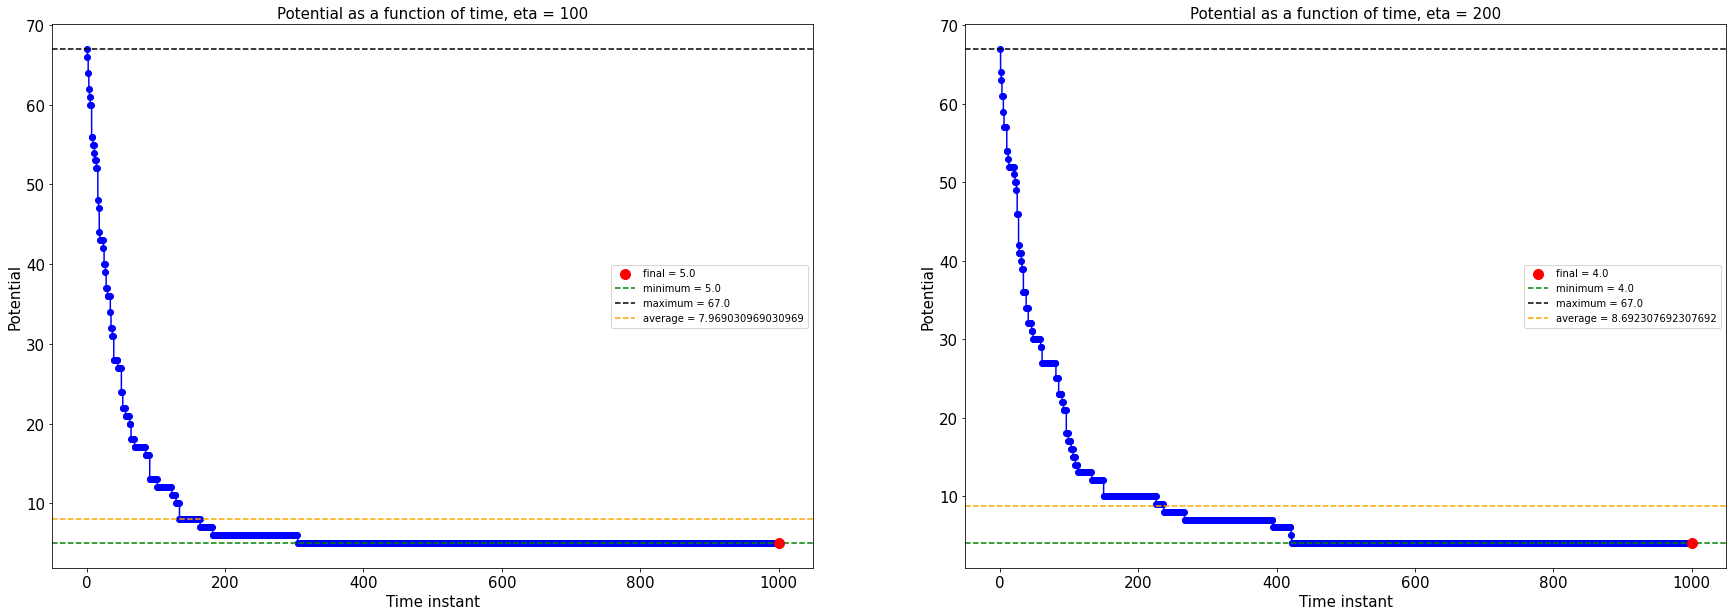

In [24]:
C_rev = dict((v,k) for k,v in C.items())
fig = plt.figure(figsize=(30, 10))
plot_counter = 1
for eta in etas[12:]:
    printmd("Inverse noise $\eta(t) = " + eta()[1] + "$")
    states, t_final = simulate(C, W, initial_configuration, eta, cost, t_final = t_final, termination = 'time')

    potentials = []
    for t in range(0,t_final+1):
        x = states[t]
        pot = potential(x, W, cost)
        potentials.append(pot)

    
    plt.subplot(1,2,plot_counter)
    plot_counter += 1
    plt.step(potentials, 'bo-', where="post")
    last = potentials[-1]
    plt.scatter(x = t_final, y = last, color = 'r', zorder = 5, s = 100, label='final = ' + str(last))
    minimum = min(potentials)
    plt.axhline(y = minimum, color = 'g', linestyle = 'dashed', label='minimum = ' + str(minimum))
    maximum = max(potentials)
    plt.axhline(y = maximum, color = 'black', linestyle = 'dashed', label='maximum = ' + str(maximum))
    average = np.mean(np.mean(potentials))
    plt.axhline(y = average, color = 'orange', linestyle = 'dashed', label='average = ' + str(average))

    plt.title('Potential as a function of time, eta = ' + eta()[1], fontsize = 15)
    plt.xlabel('Time instant', fontsize = 15)
    plt.ylabel('Potential', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.legend(fontsize = 10)
    
    
    print("\tFinal potential =", last)
    print("\tMinimum potential =", minimum)
    print("\tMaximum potential =", maximum)
    print("\tAvrage potential =", average)
    print("\n")
    
fig.savefig(img_dir + 'img ' + str(img_counter) + '.' + image_format, format=image_format)
img_counter += 1

Inverse noise $\eta(t) = t/100$

	Final potential = 4.0
	Minimum potential = 4.0
	Maximum potential = 69.0
	Avrage potential = 12.333666333666333




Inverse noise $\eta(t) = t^2/5000$

	Final potential = 4.0
	Minimum potential = 4.0
	Maximum potential = 71.0
	Avrage potential = 11.406593406593407




Inverse noise $\eta(t) = \sqrt{t}/100$

	Final potential = 40.0
	Minimum potential = 38.0
	Maximum potential = 77.0
	Avrage potential = 54.36463536463536




Inverse noise $\eta(t) = 0.1$

	Final potential = 59.0
	Minimum potential = 45.0
	Maximum potential = 78.0
	Avrage potential = 58.02097902097902




Inverse noise $\eta(t) = 0.01$

	Final potential = 62.0
	Minimum potential = 48.0
	Maximum potential = 79.0
	Avrage potential = 63.607392607392605




Inverse noise $\eta(t) = 0.001$

	Final potential = 58.0
	Minimum potential = 43.0
	Maximum potential = 88.0
	Avrage potential = 64.84515484515485




Inverse noise $\eta(t) = 0.0001$

	Final potential = 57.0
	Minimum potential = 48.0
	Maximum potential = 99.0
	Avrage potential = 66.6003996003996




Inverse noise $\eta(t) = 1e-09$

	Final potential = 78.0
	Minimum potential = 49.0
	Maximum potential = 88.0
	Avrage potential = 68.21178821178822




Inverse noise $\eta(t) = 1$

	Final potential = 24.0
	Minimum potential = 21.0
	Maximum potential = 67.0
	Avrage potential = 29.65934065934066




Inverse noise $\eta(t) = 2$

	Final potential = 14.0
	Minimum potential = 8.0
	Maximum potential = 67.0
	Avrage potential = 15.795204795204794




Inverse noise $\eta(t) = 5$

	Final potential = 4.0
	Minimum potential = 4.0
	Maximum potential = 67.0
	Avrage potential = 7.891108891108891




Inverse noise $\eta(t) = 10$

	Final potential = 4.0
	Minimum potential = 4.0
	Maximum potential = 67.0
	Avrage potential = 7.7272727272727275




Inverse noise $\eta(t) = 100$

	Final potential = 4.0
	Minimum potential = 4.0
	Maximum potential = 67.0
	Avrage potential = 7.791208791208791




Inverse noise $\eta(t) = 200$

	Final potential = 4.0
	Minimum potential = 4.0
	Maximum potential = 67.0
	Avrage potential = 8.525474525474525




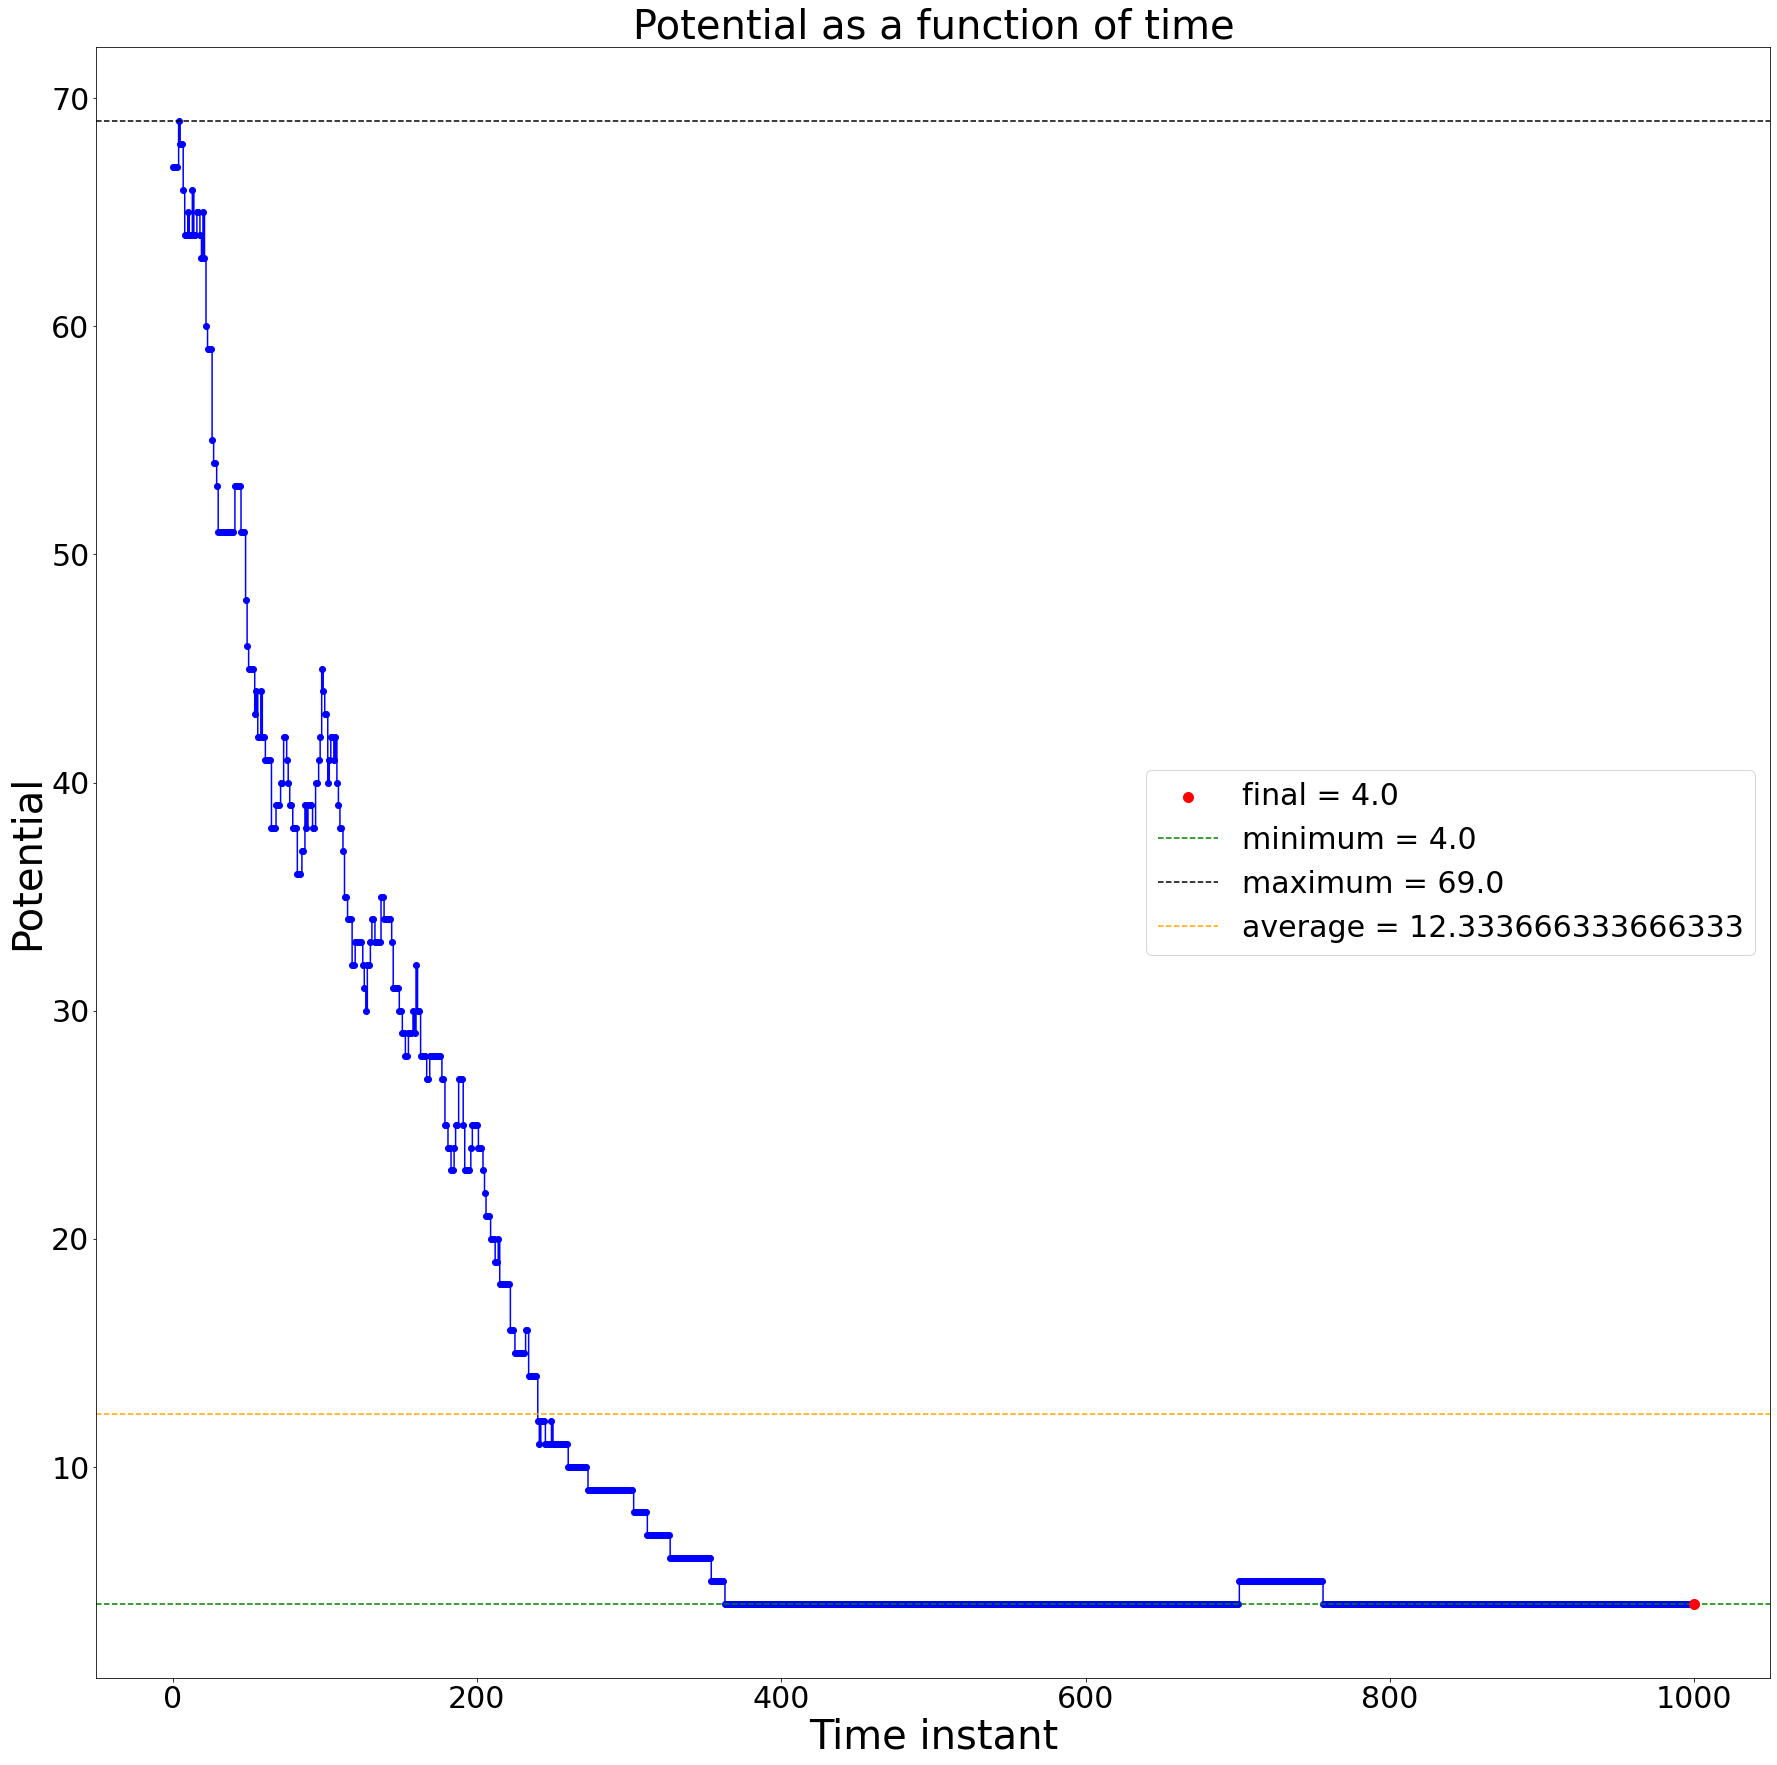

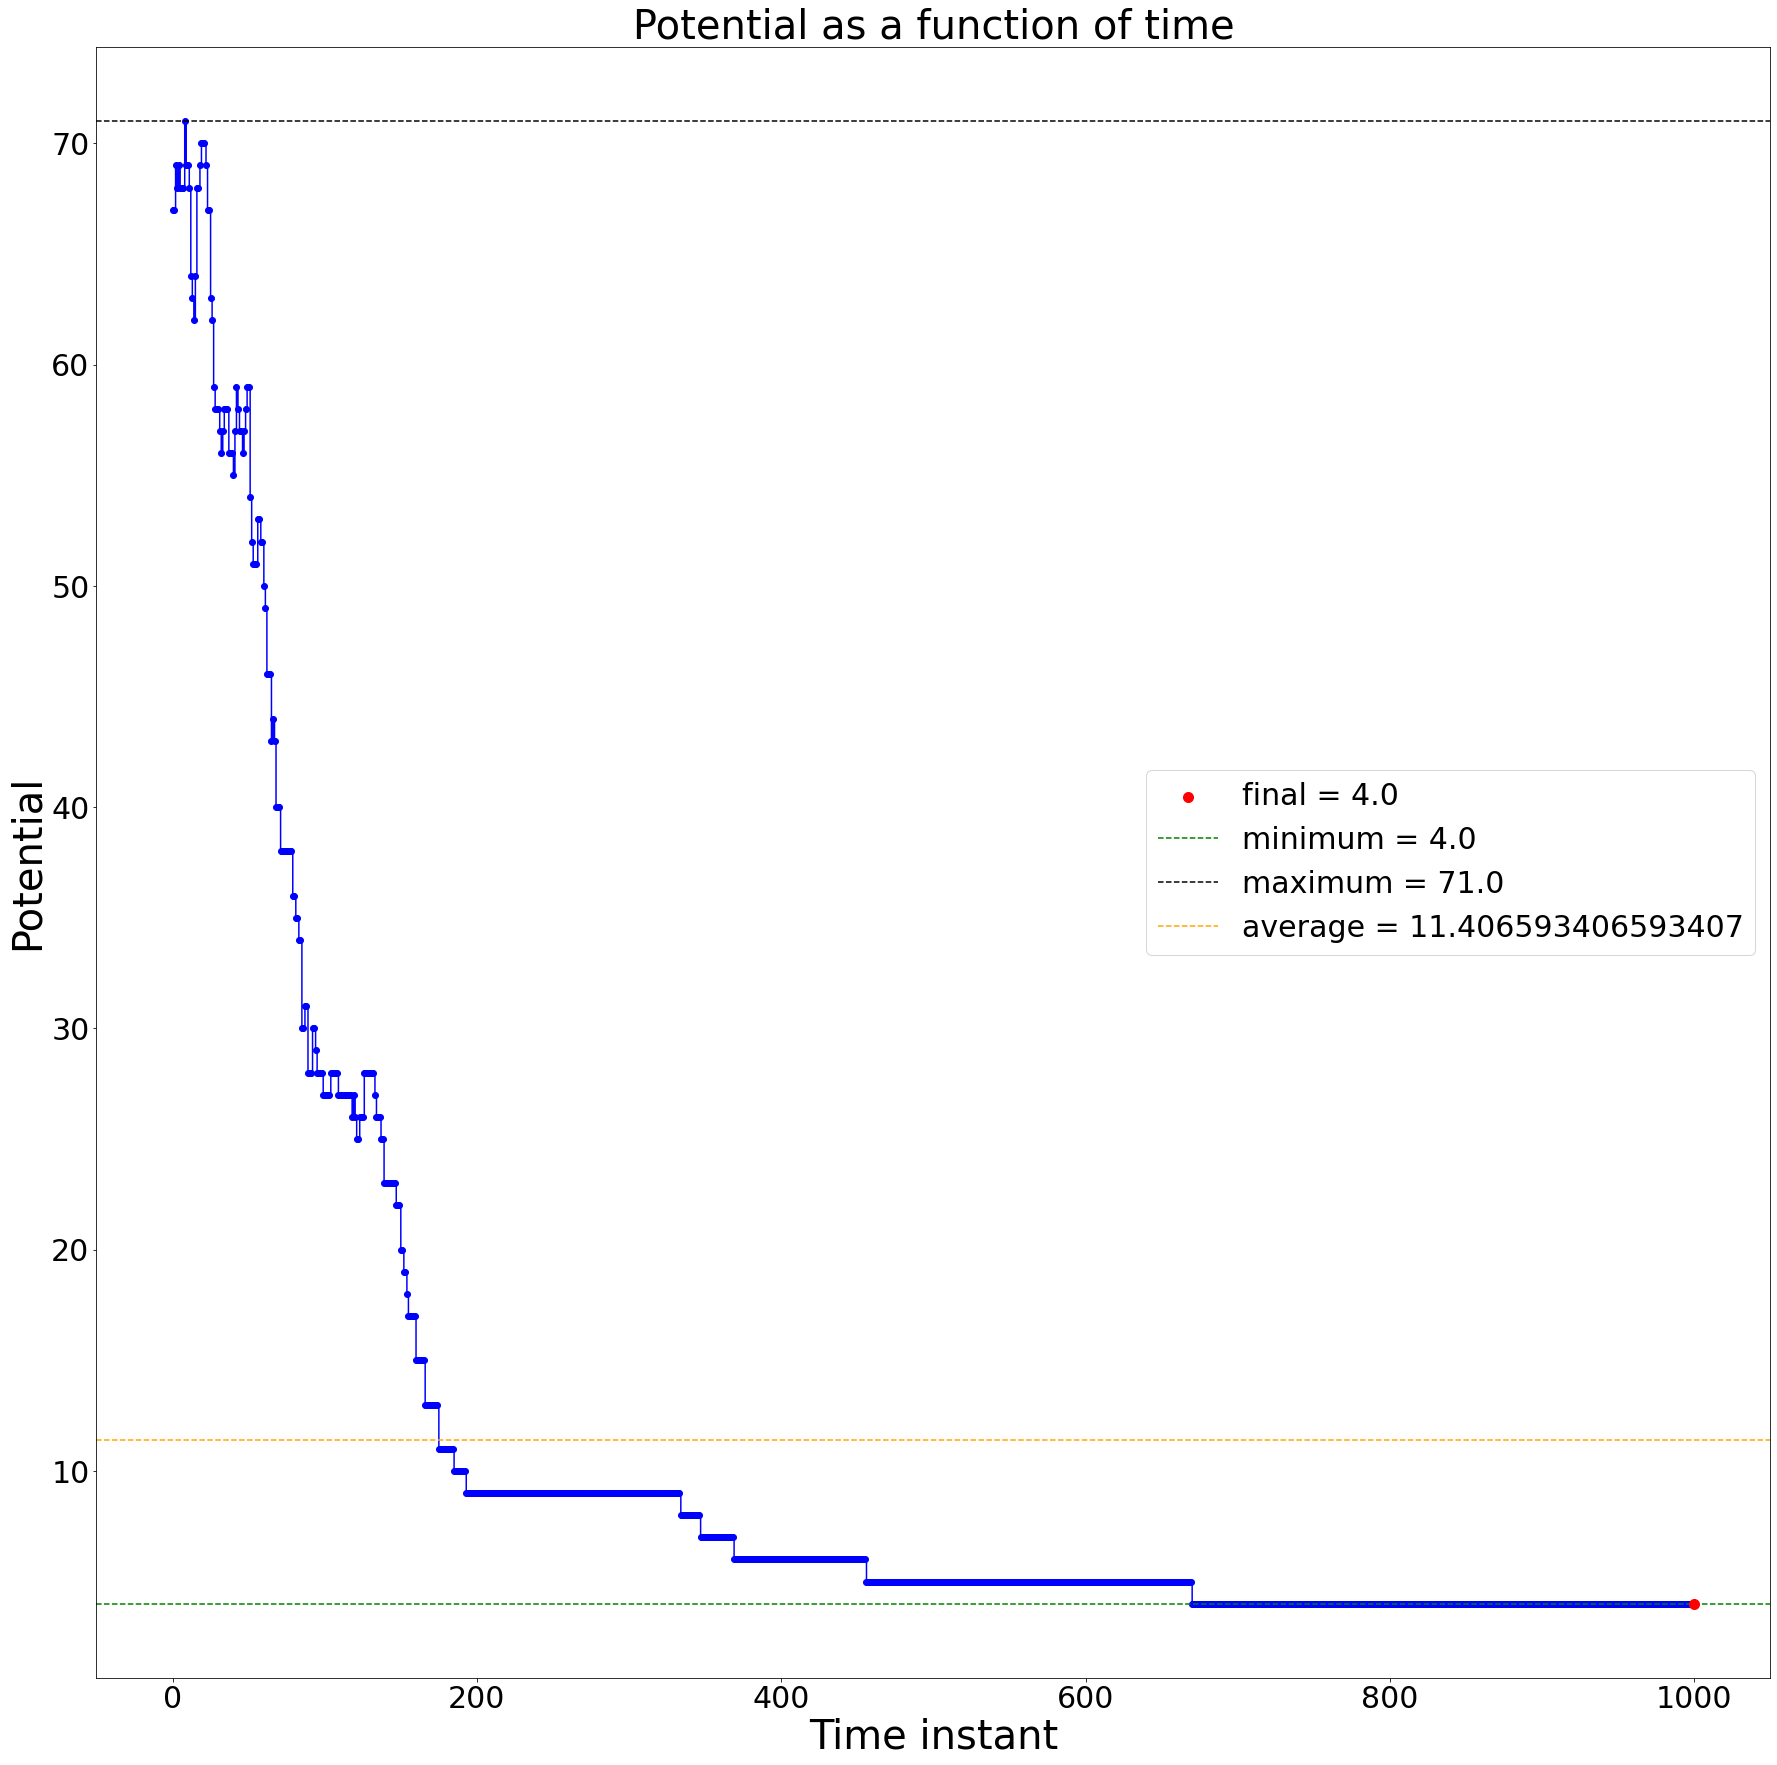

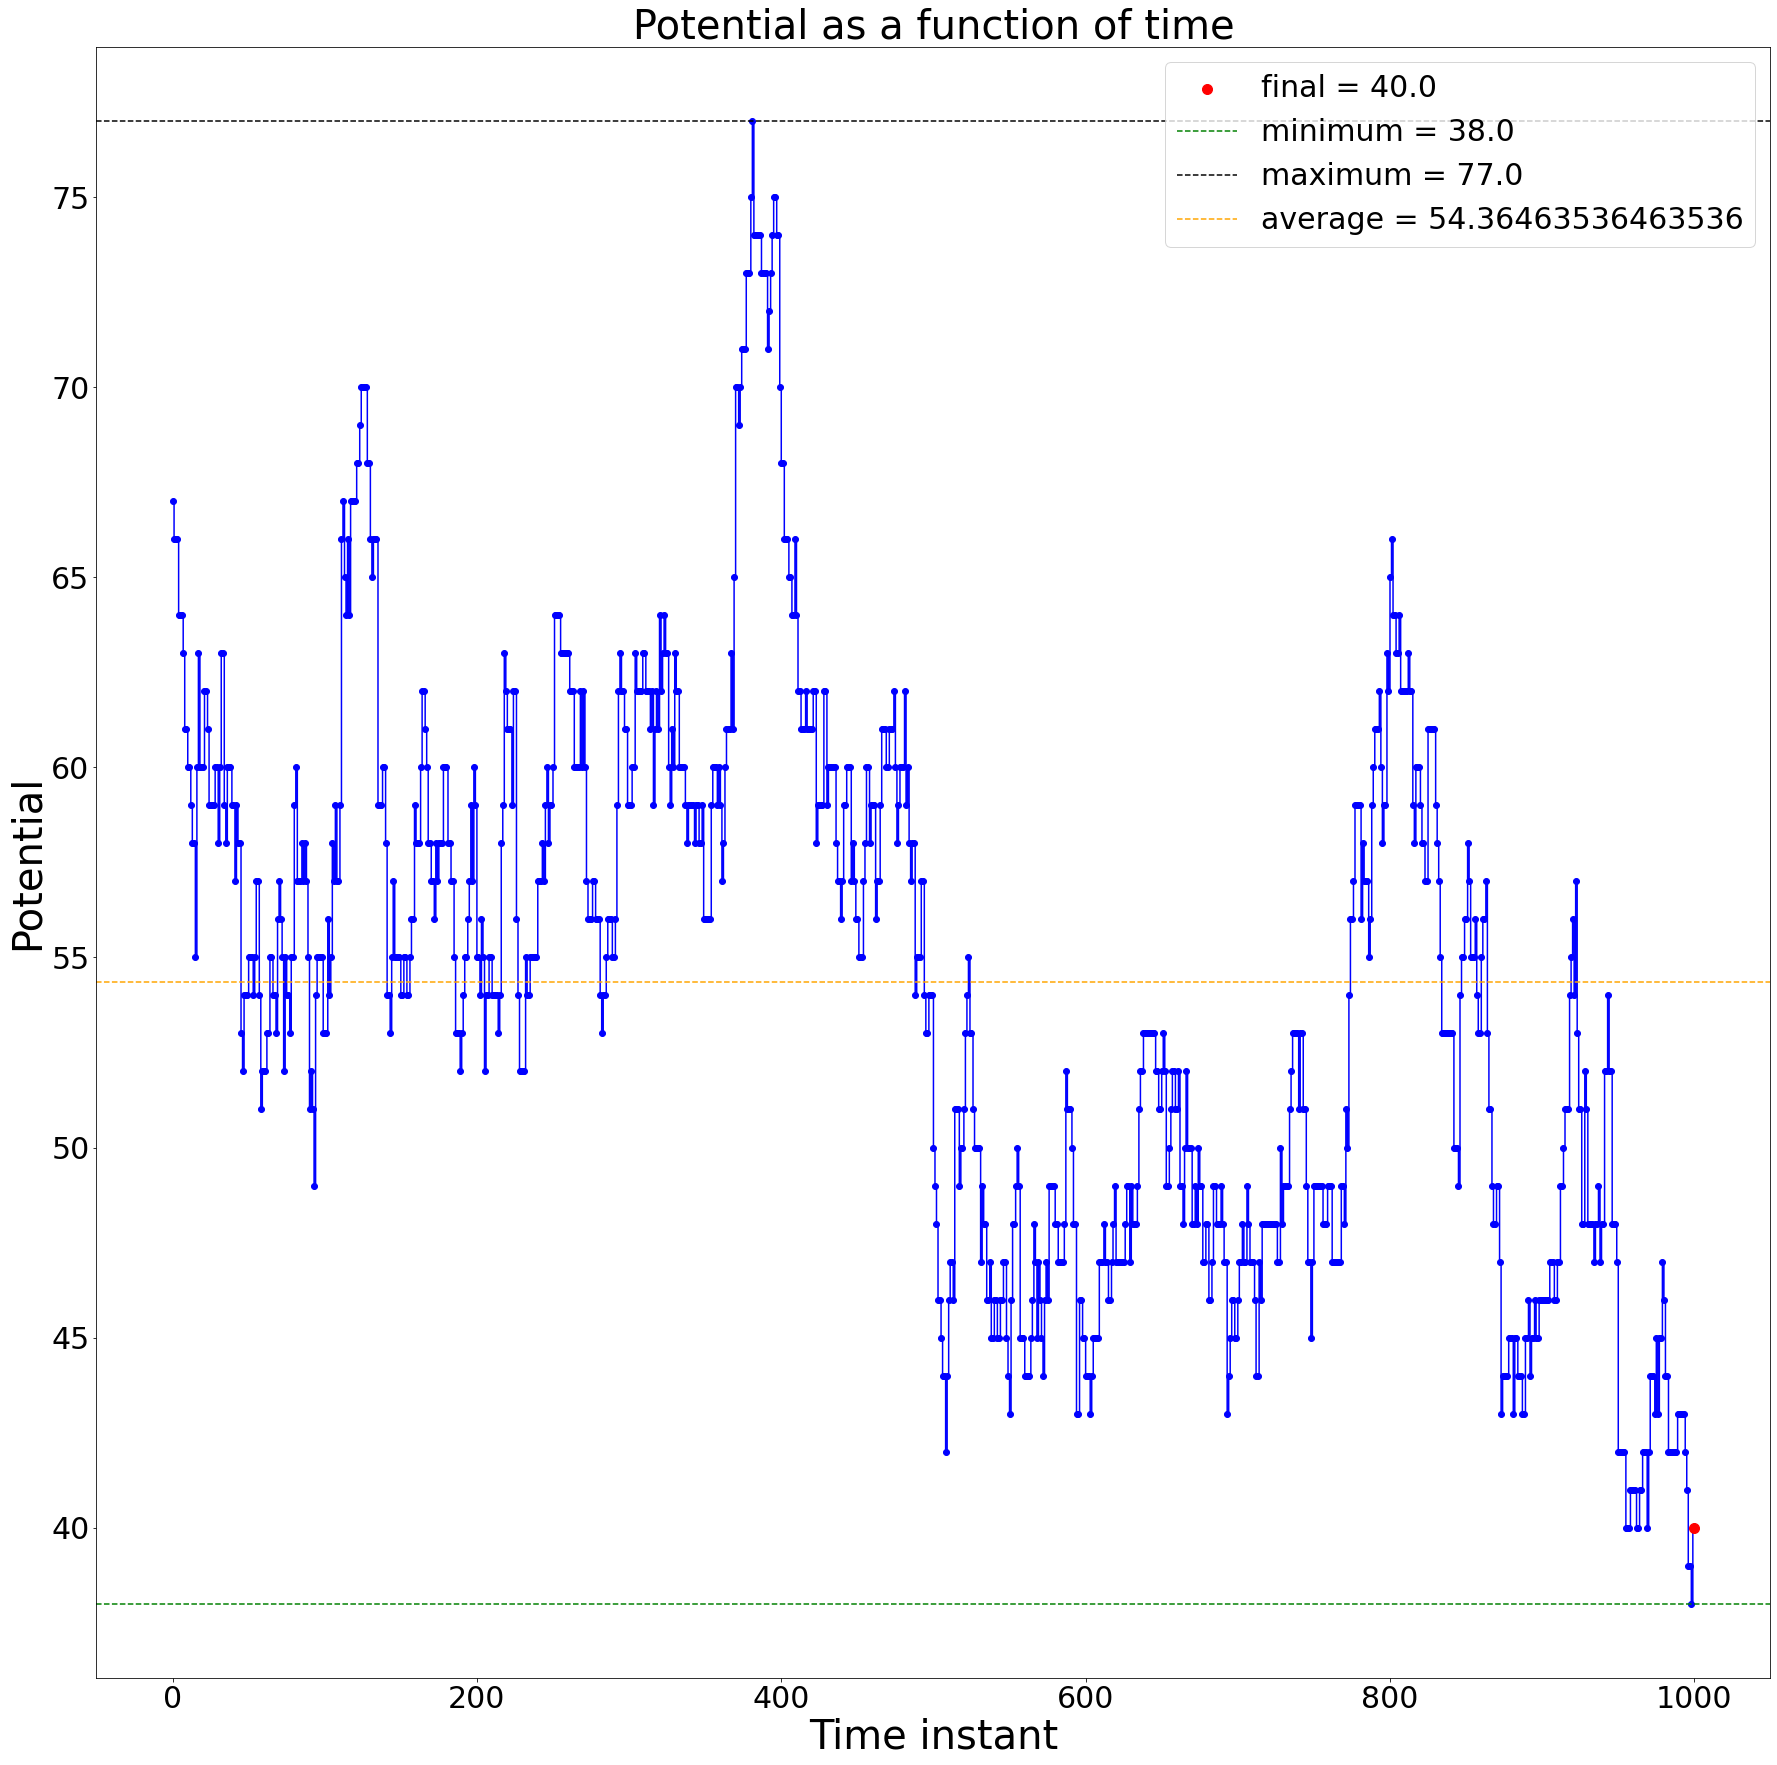

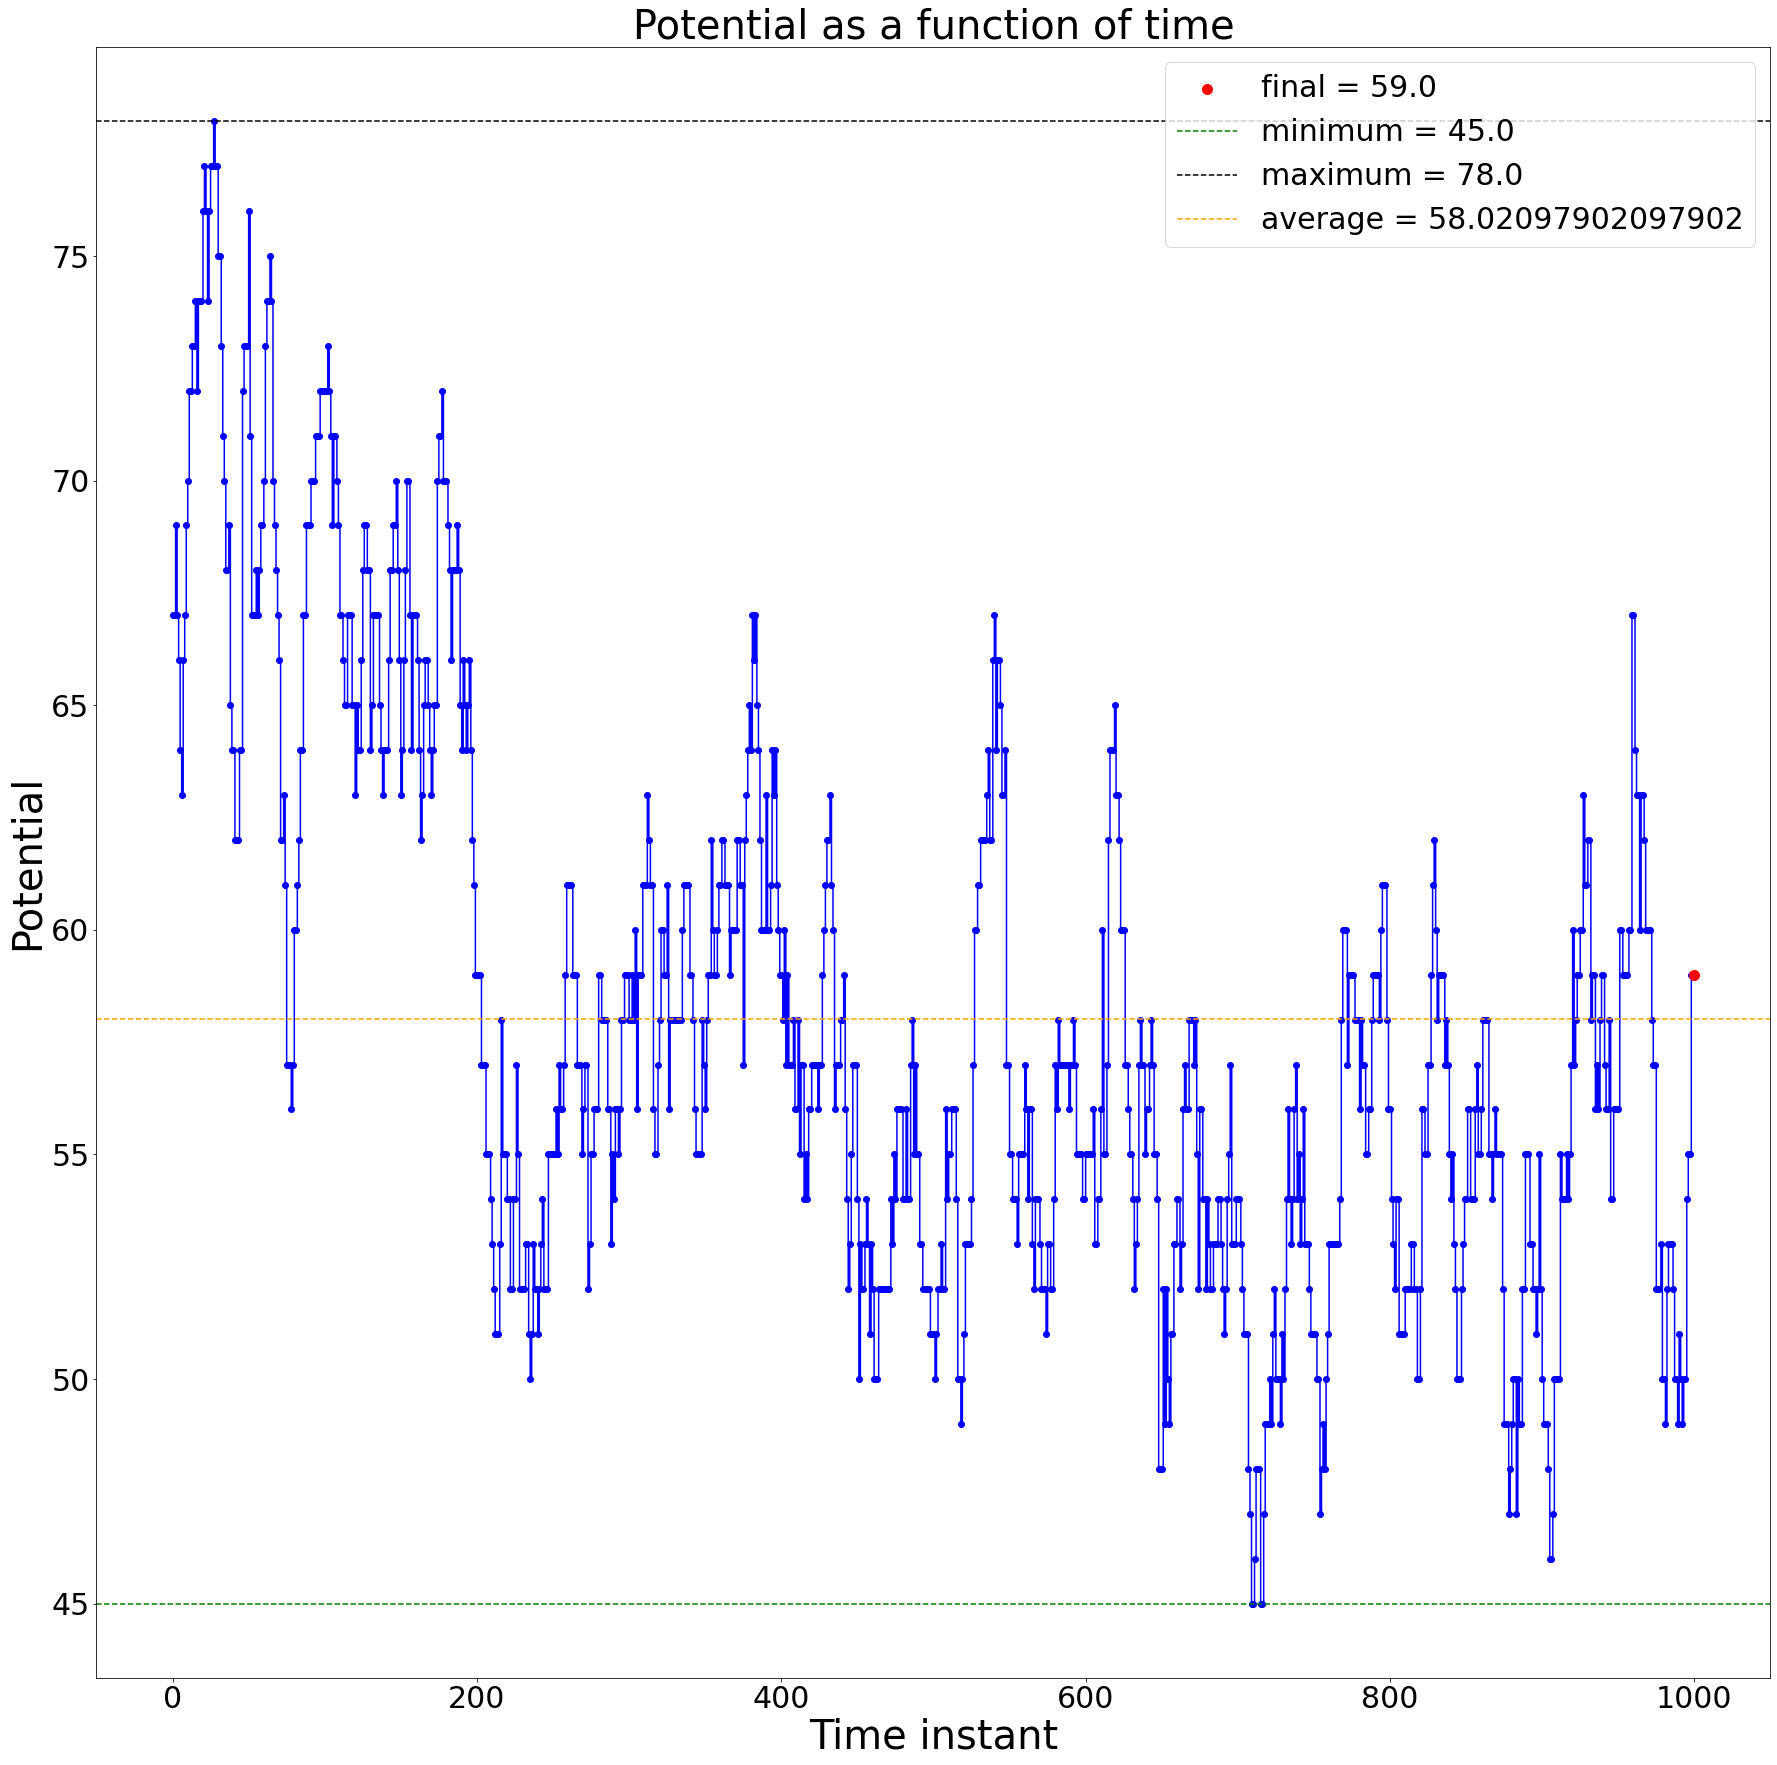

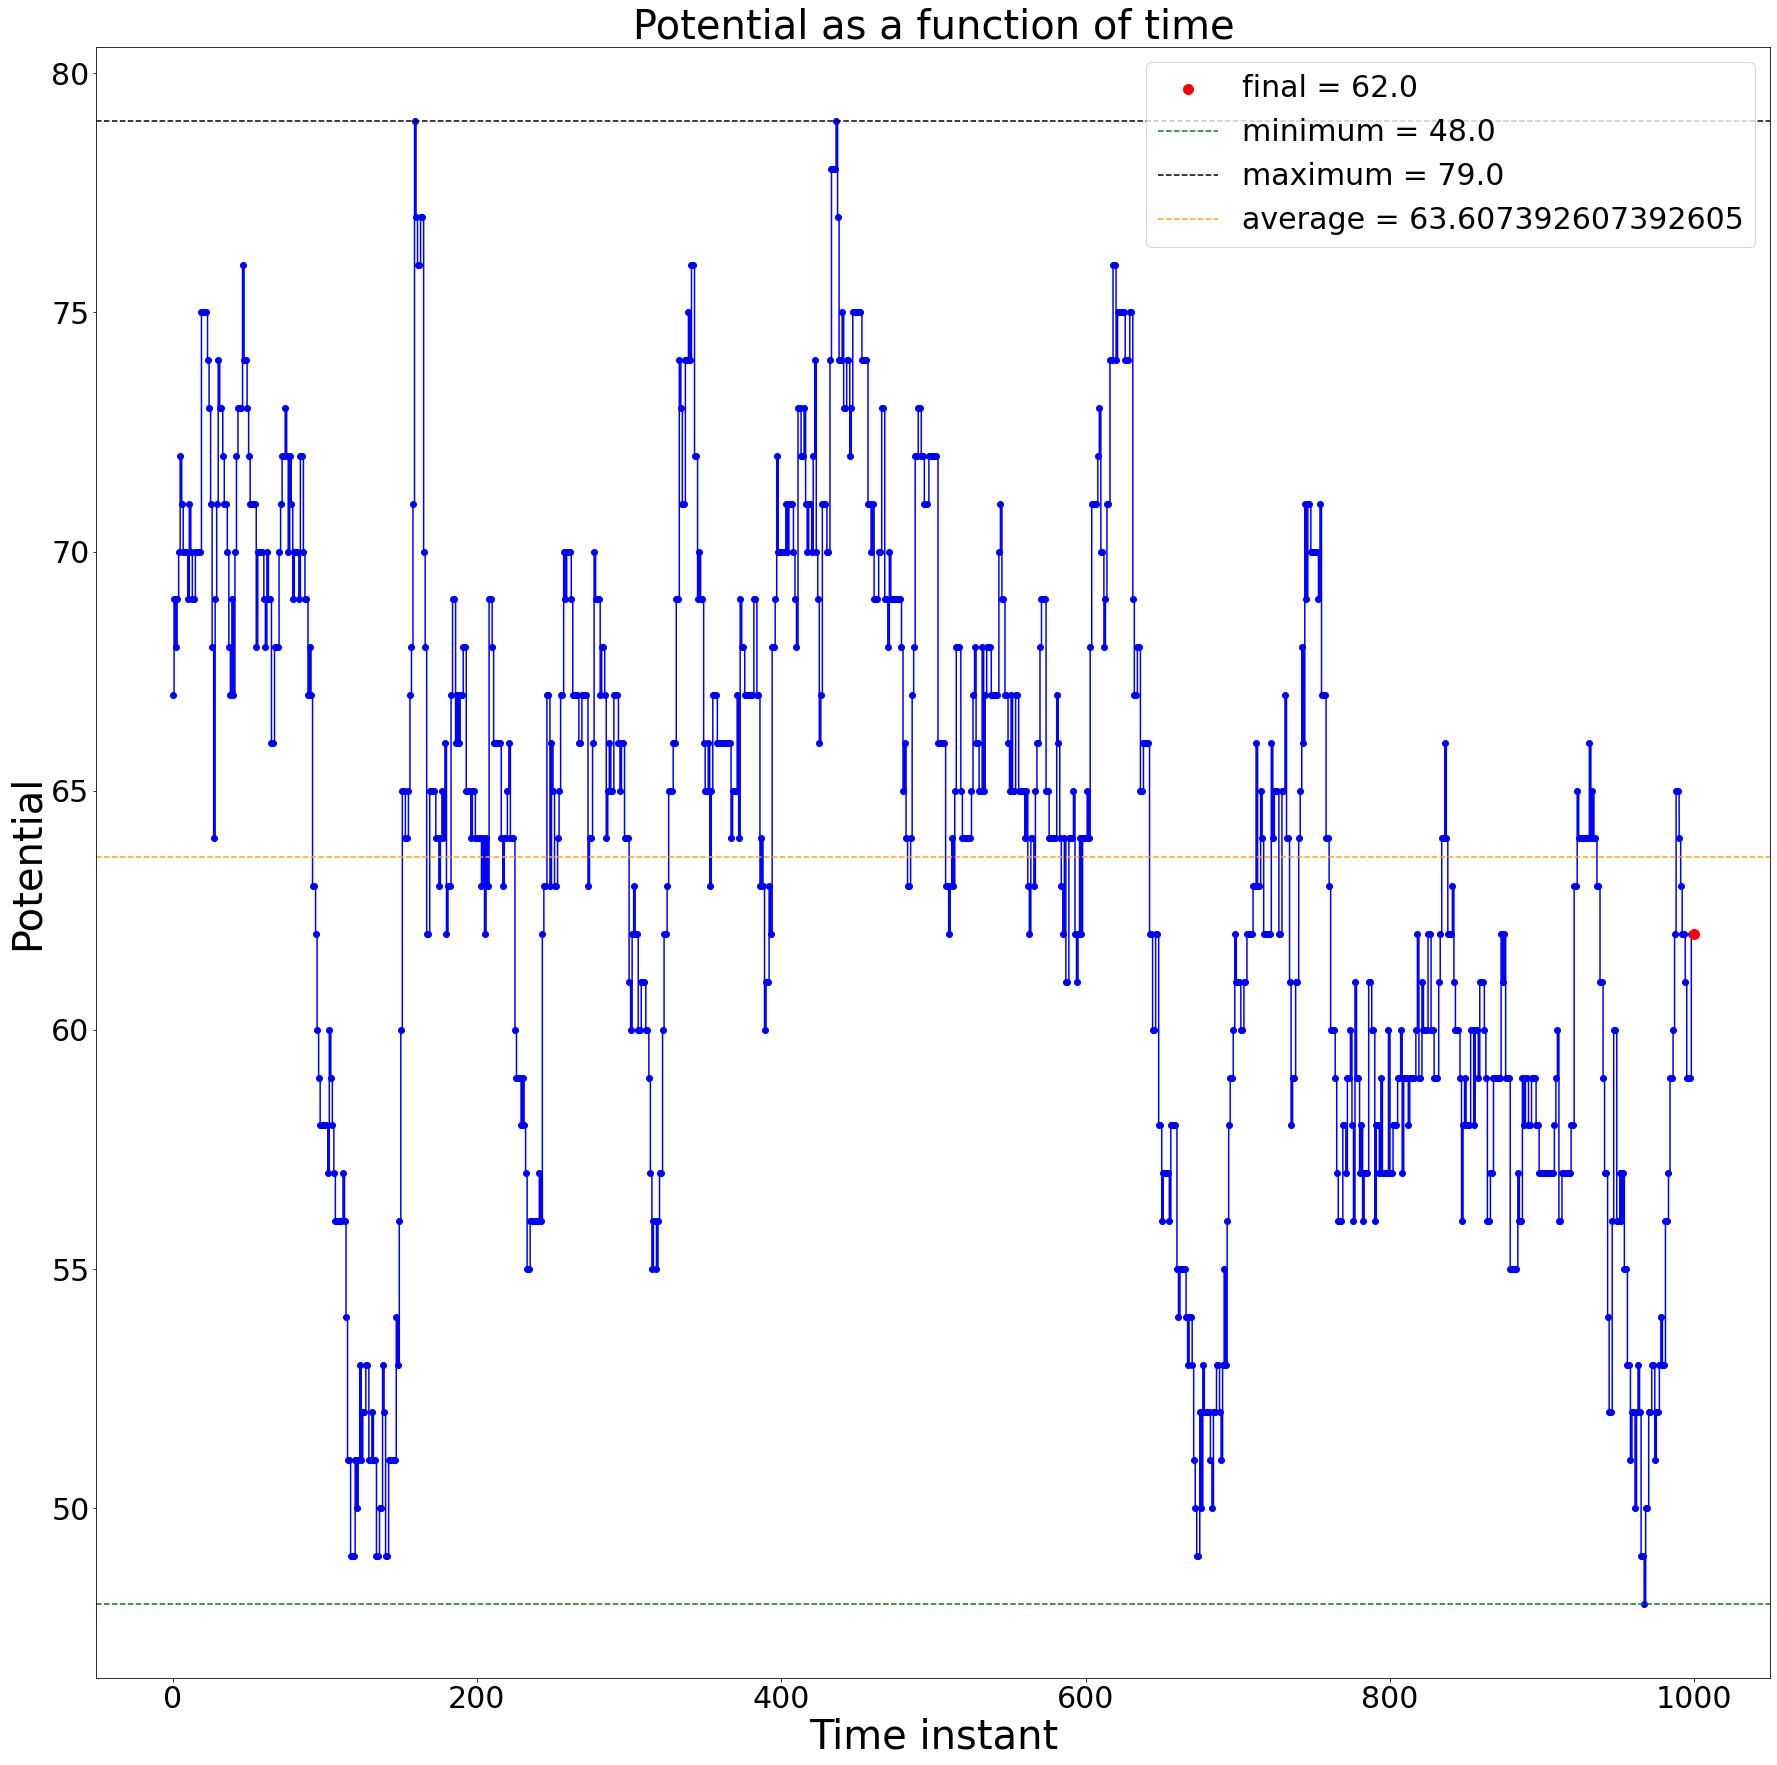

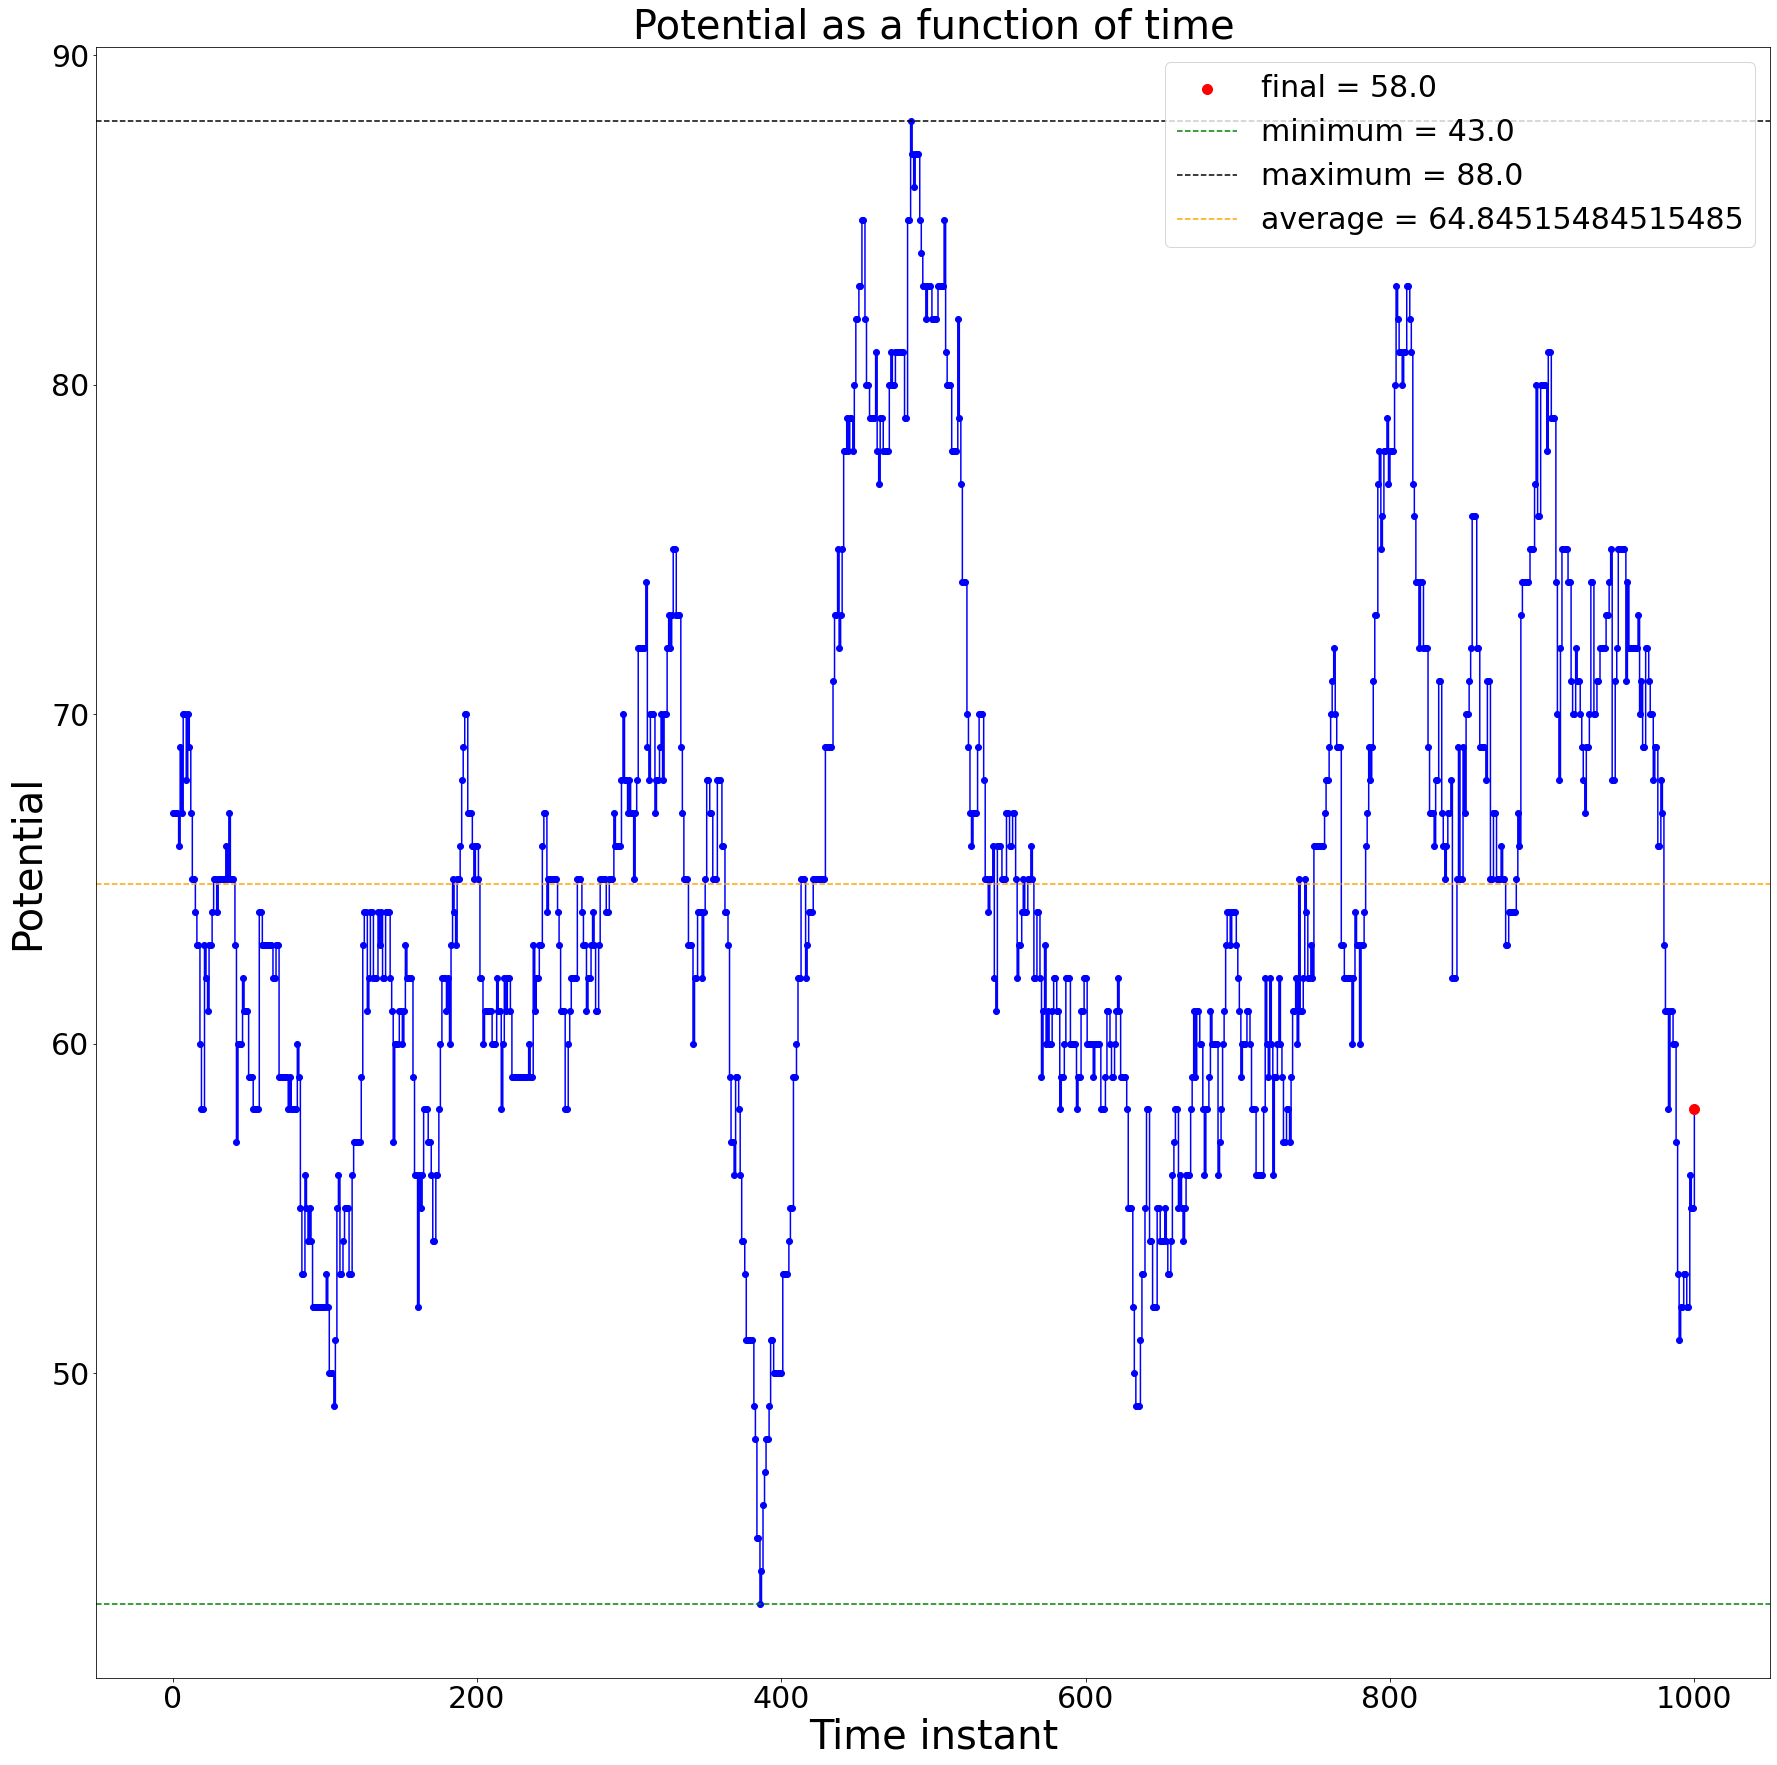

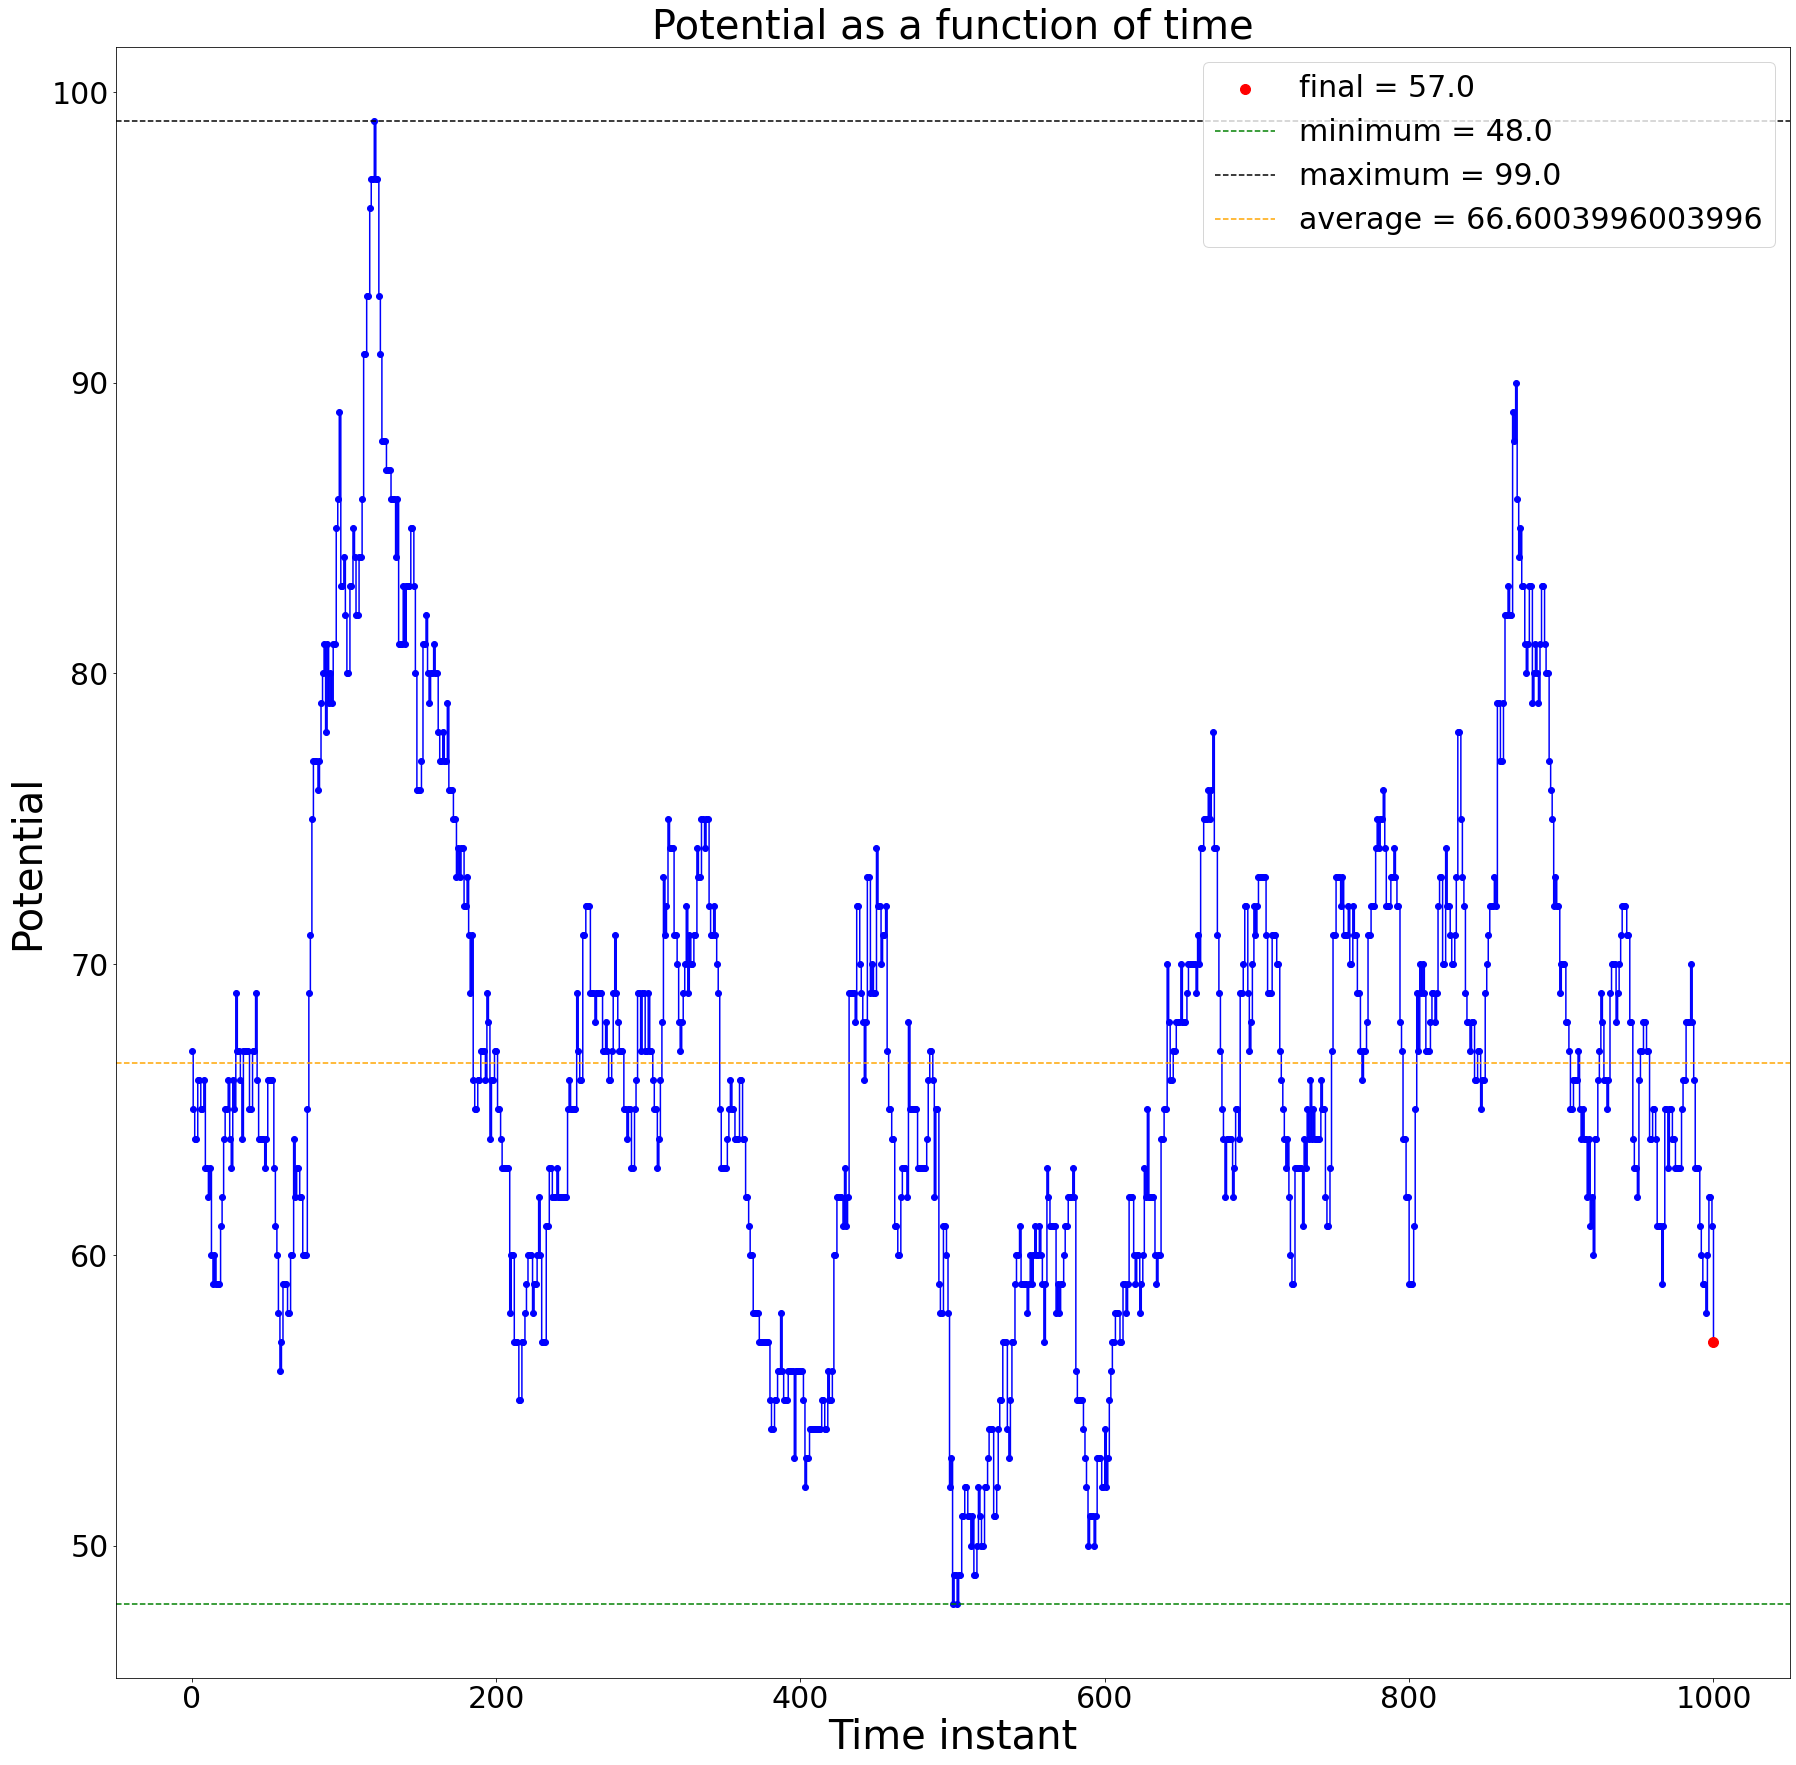

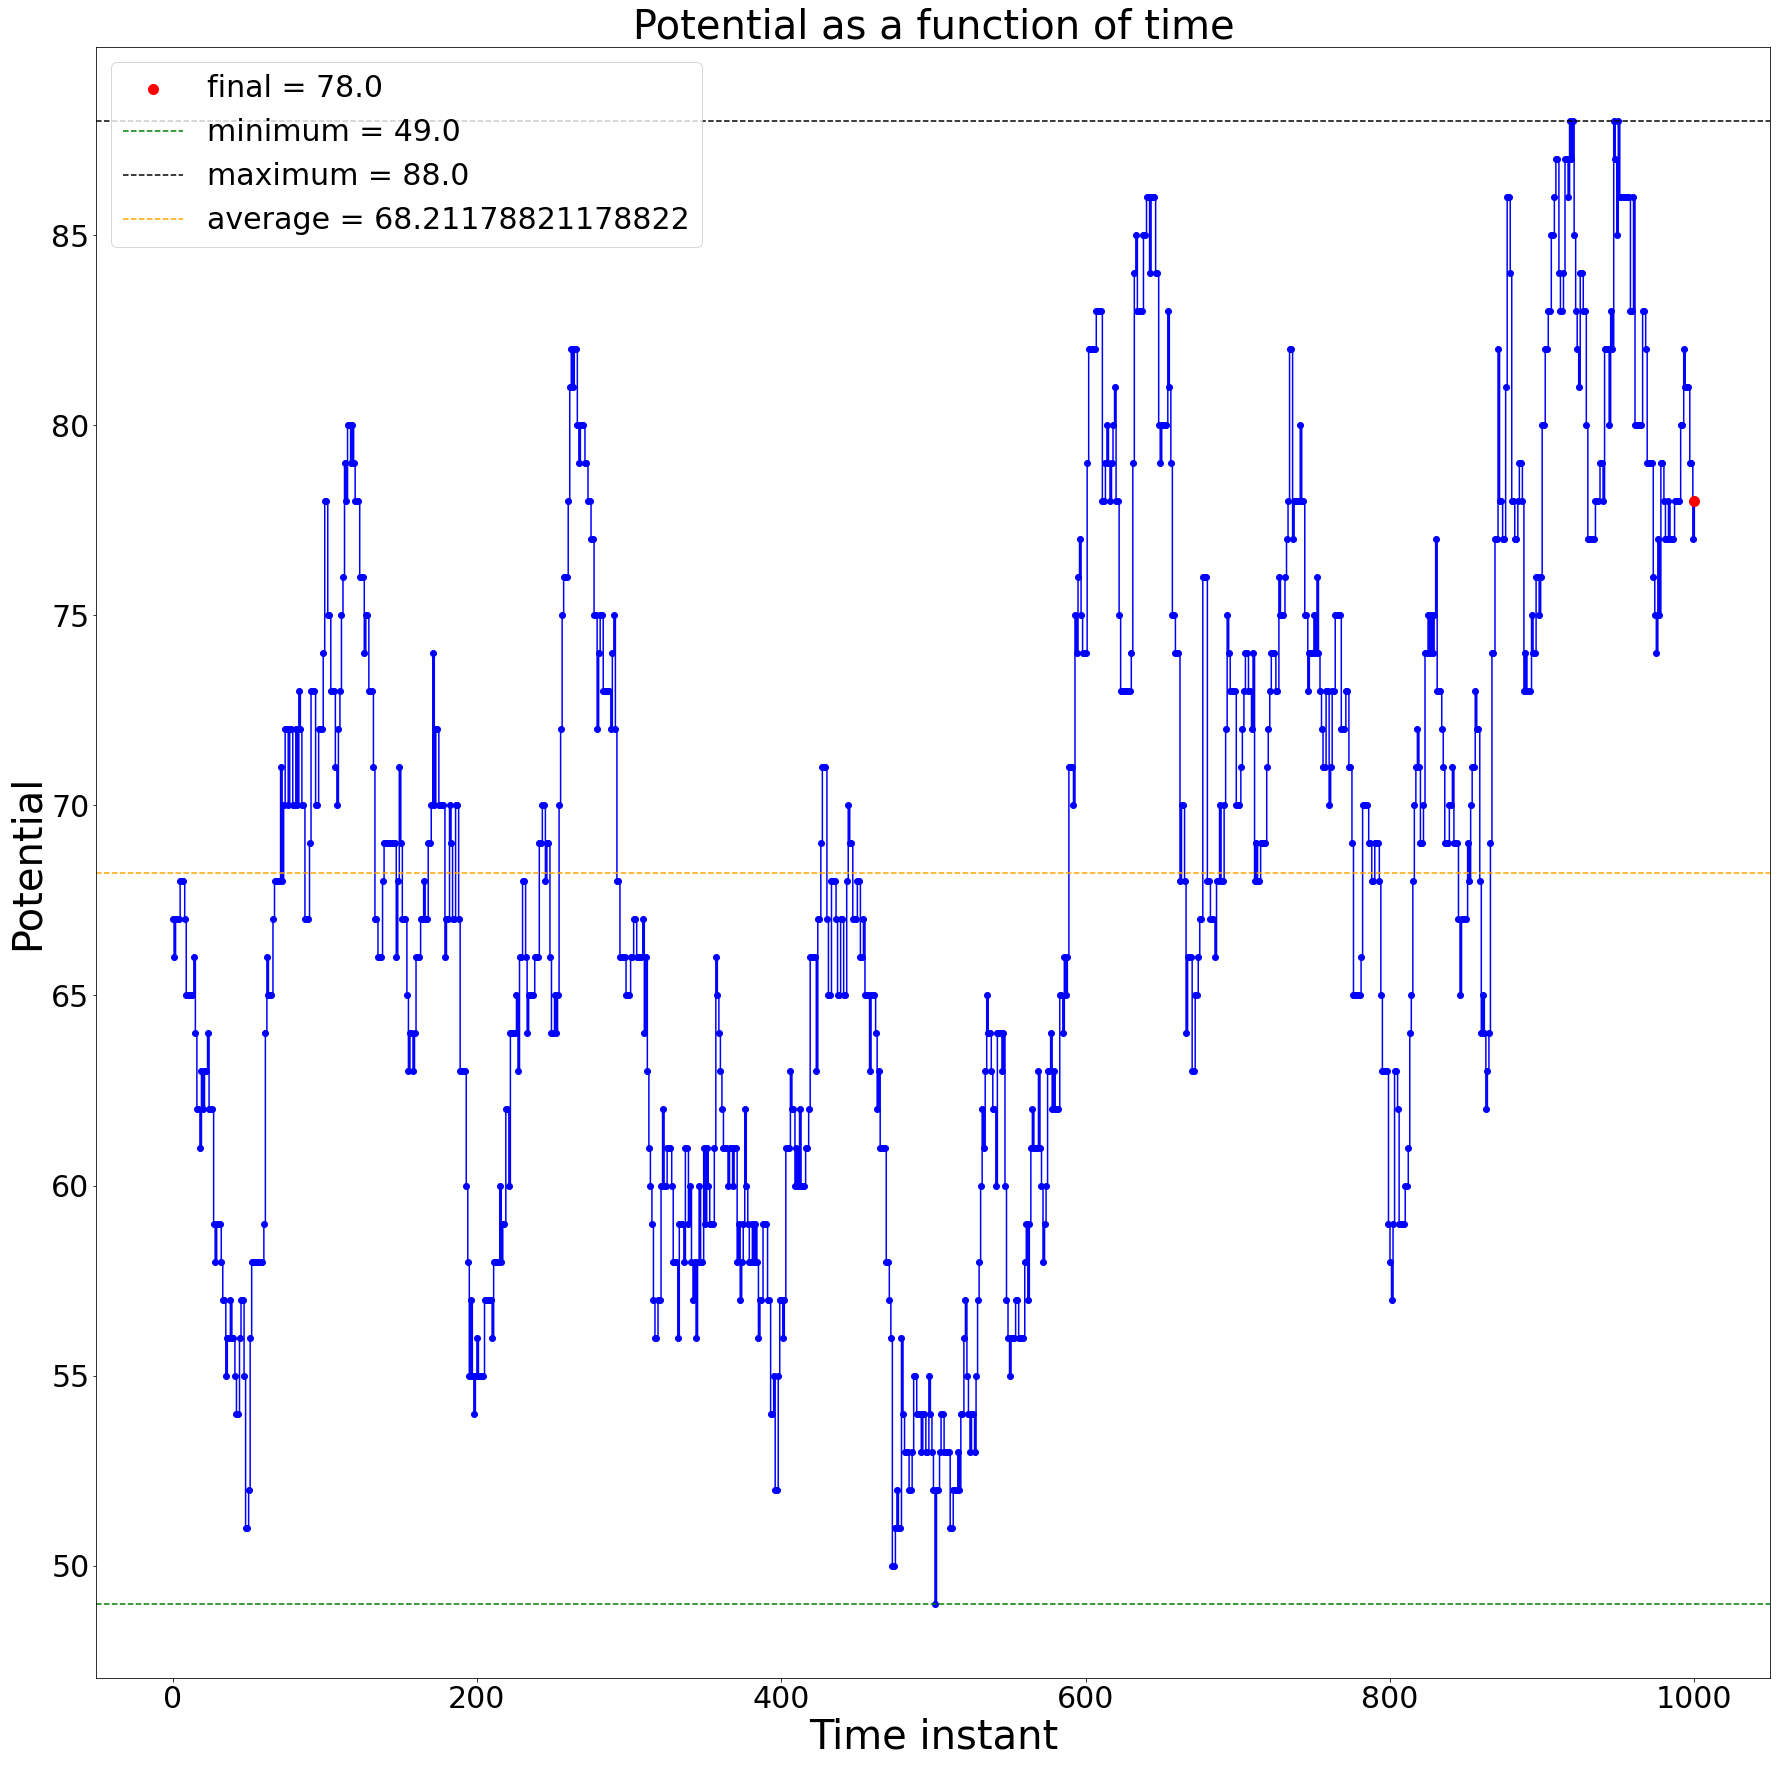

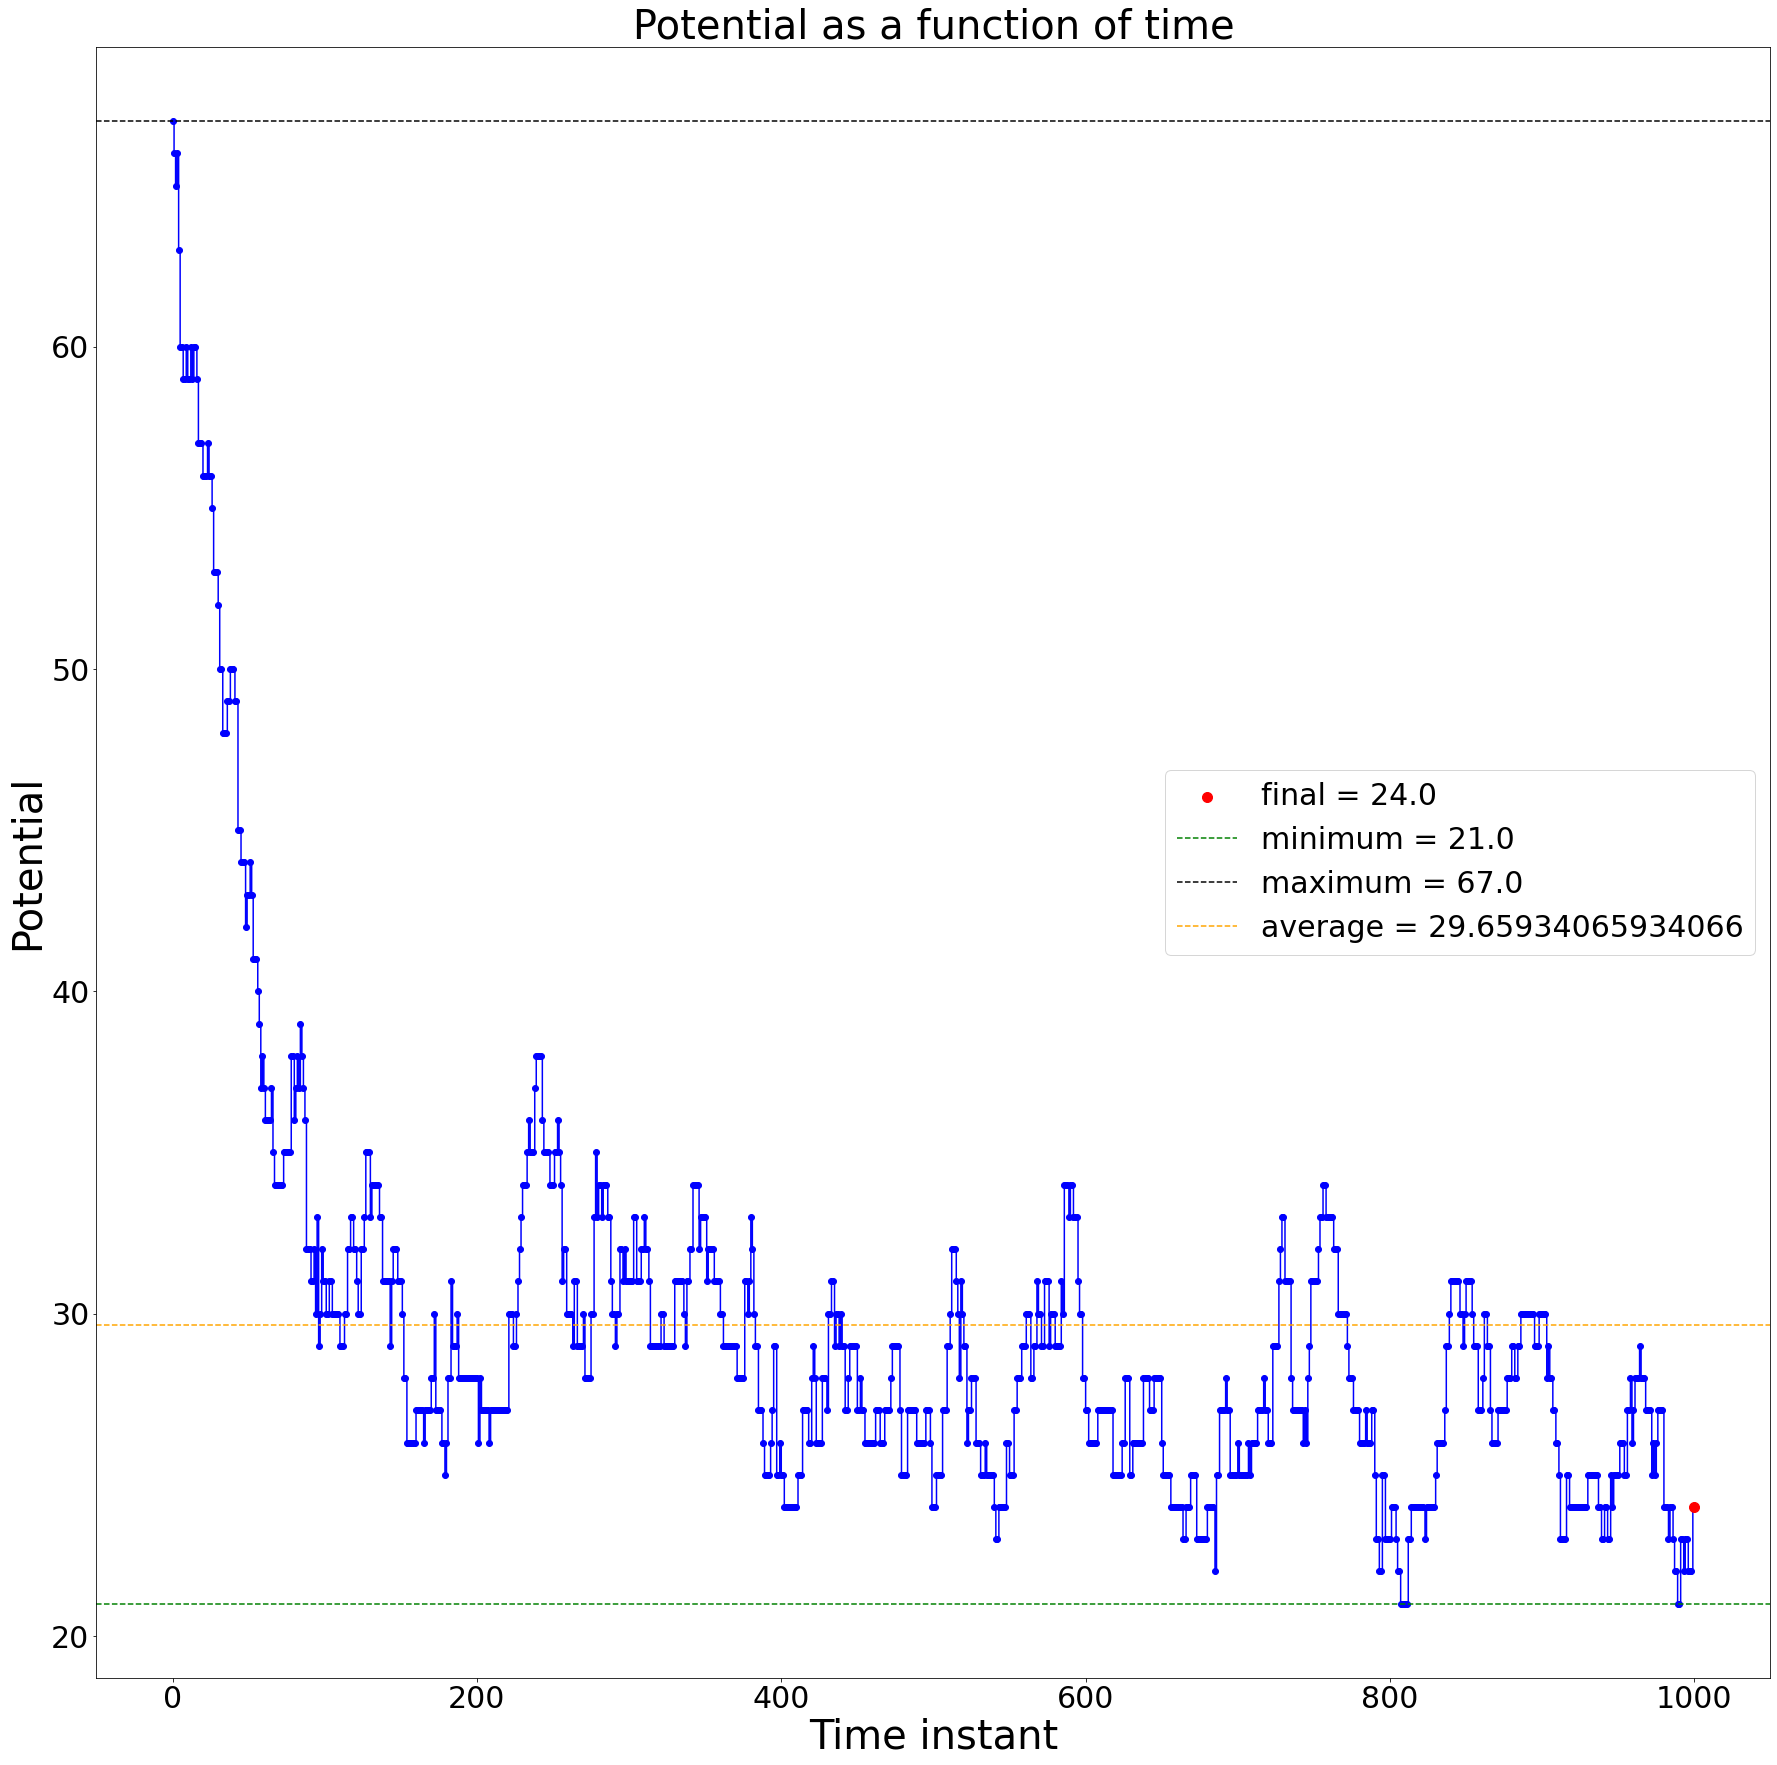

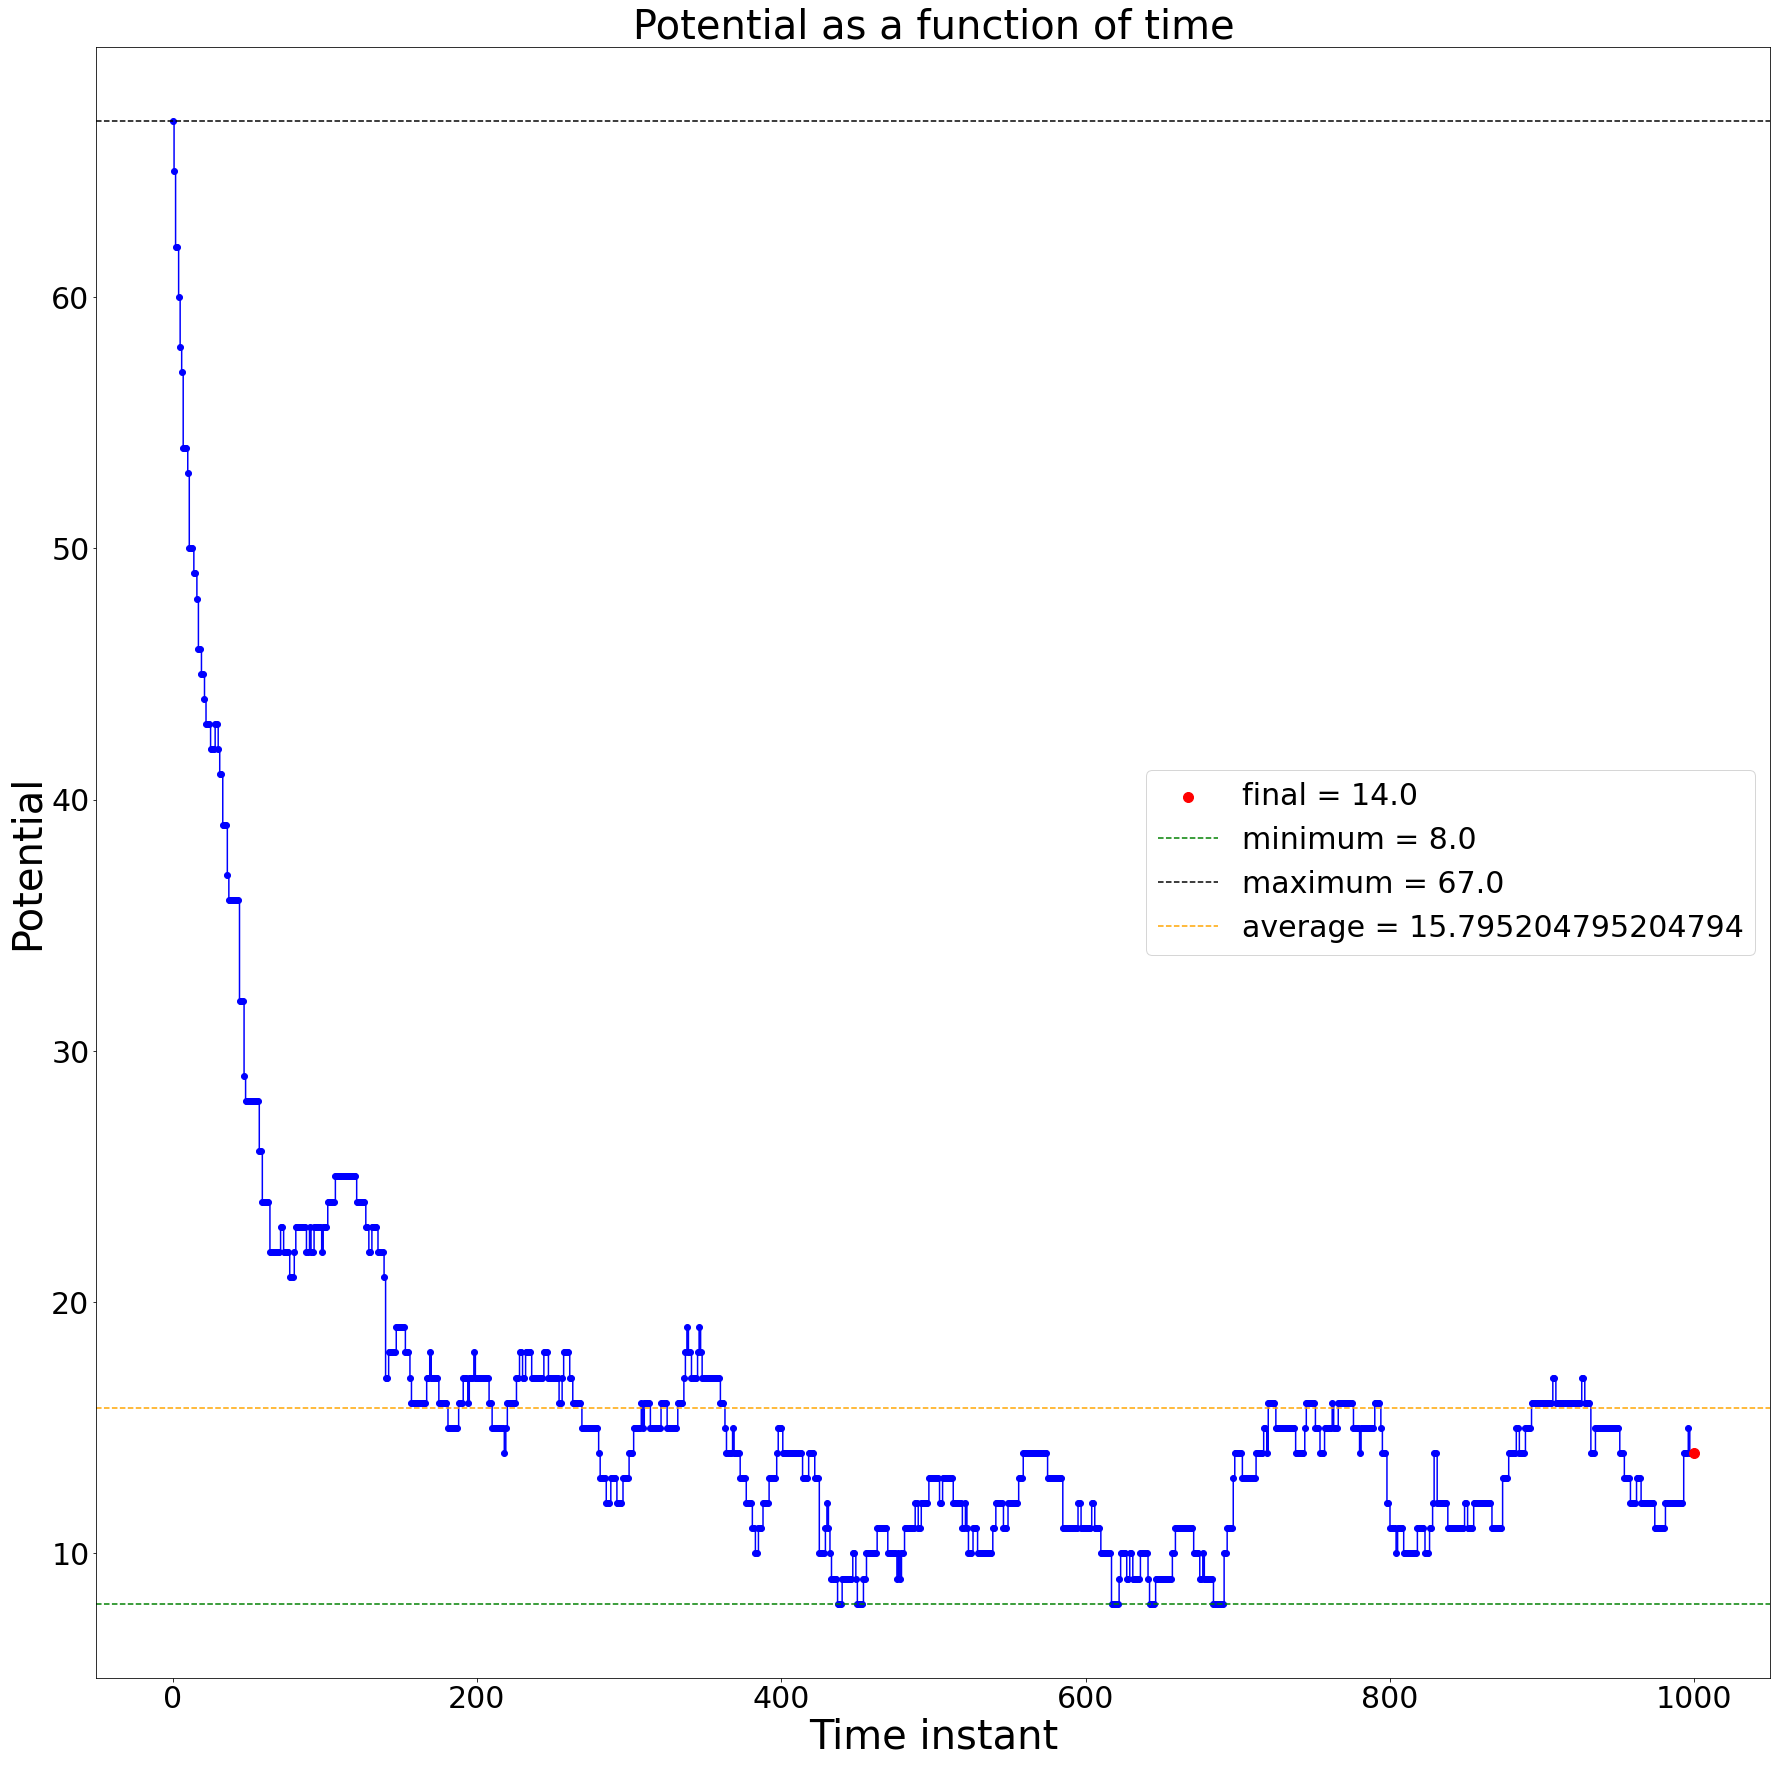

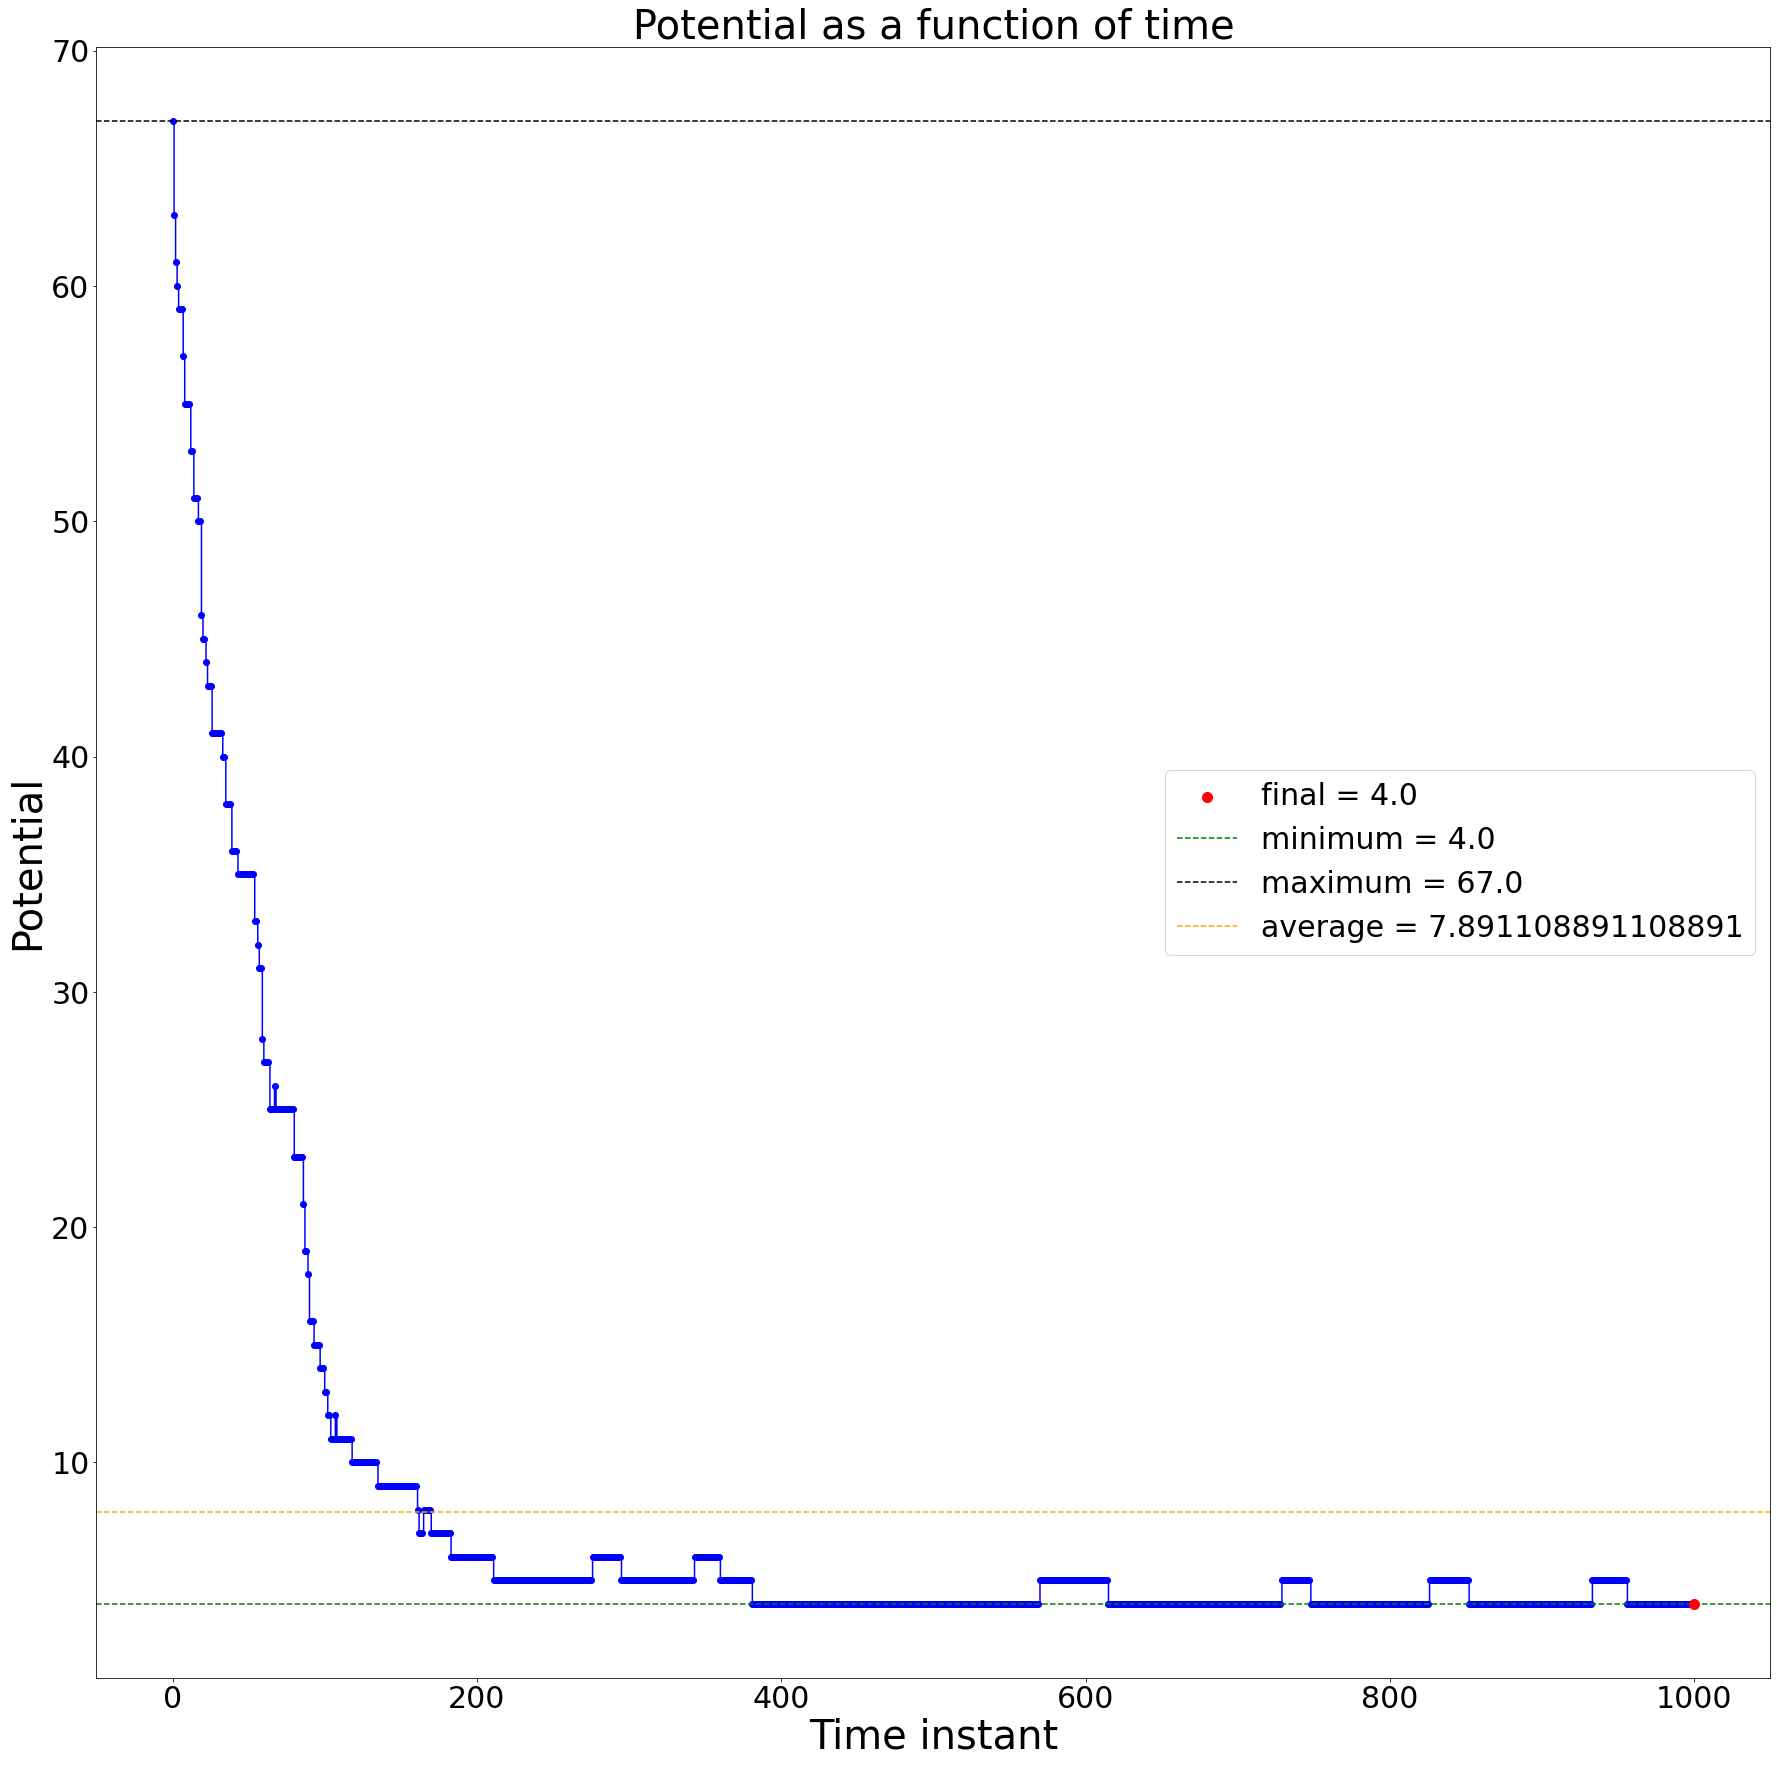

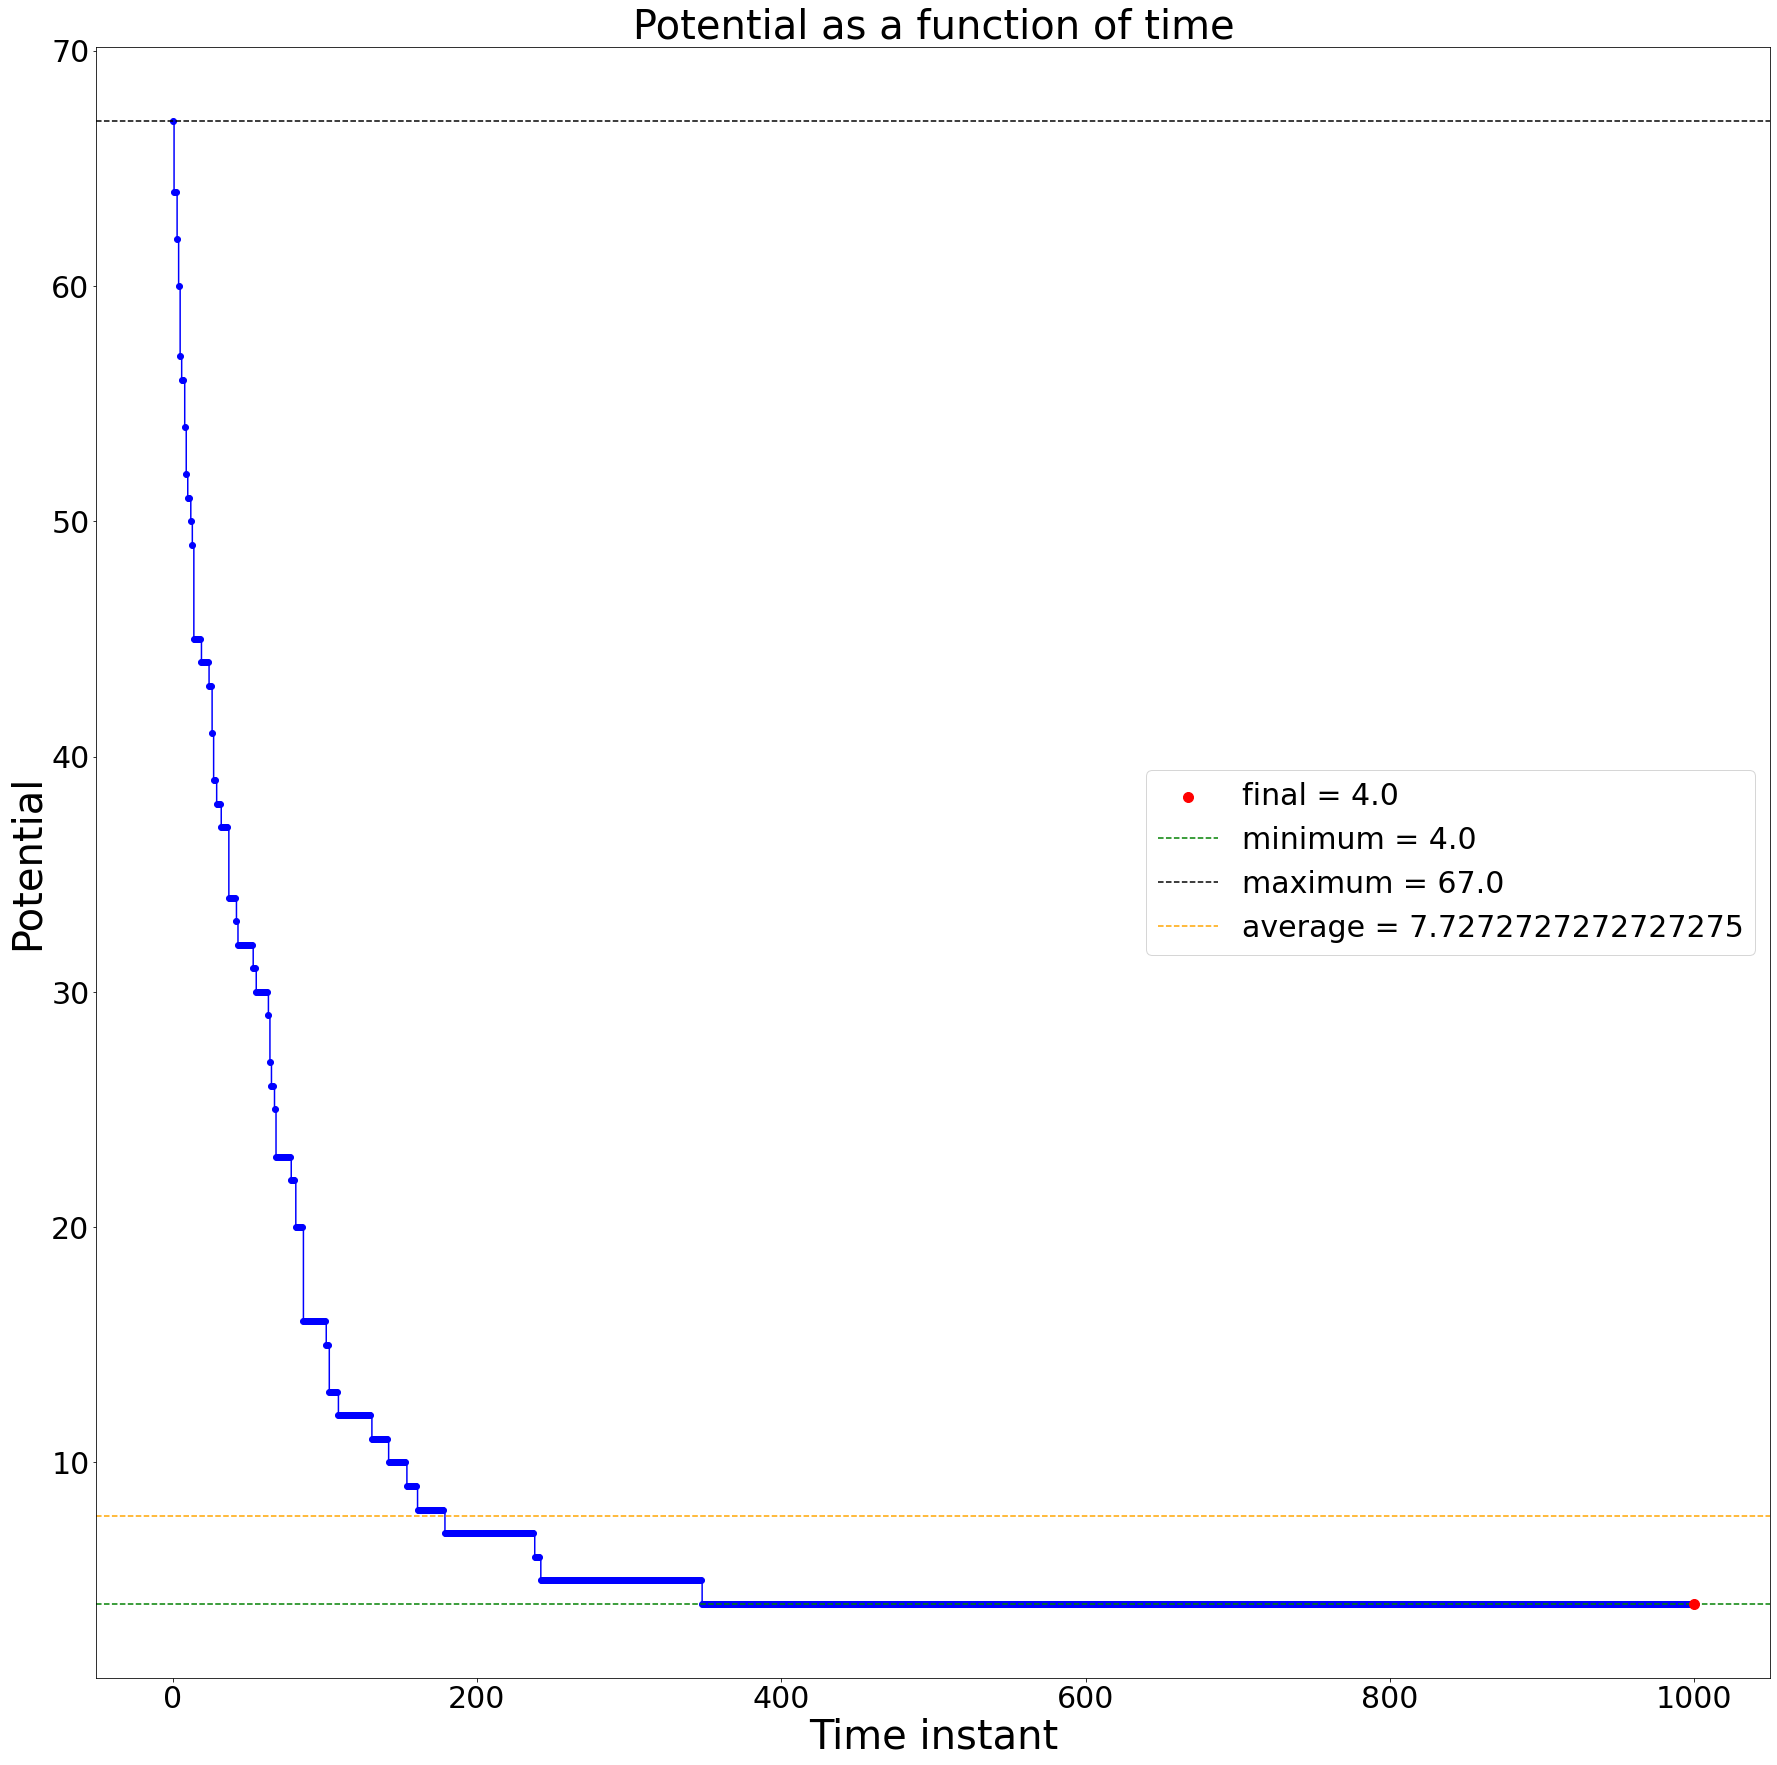

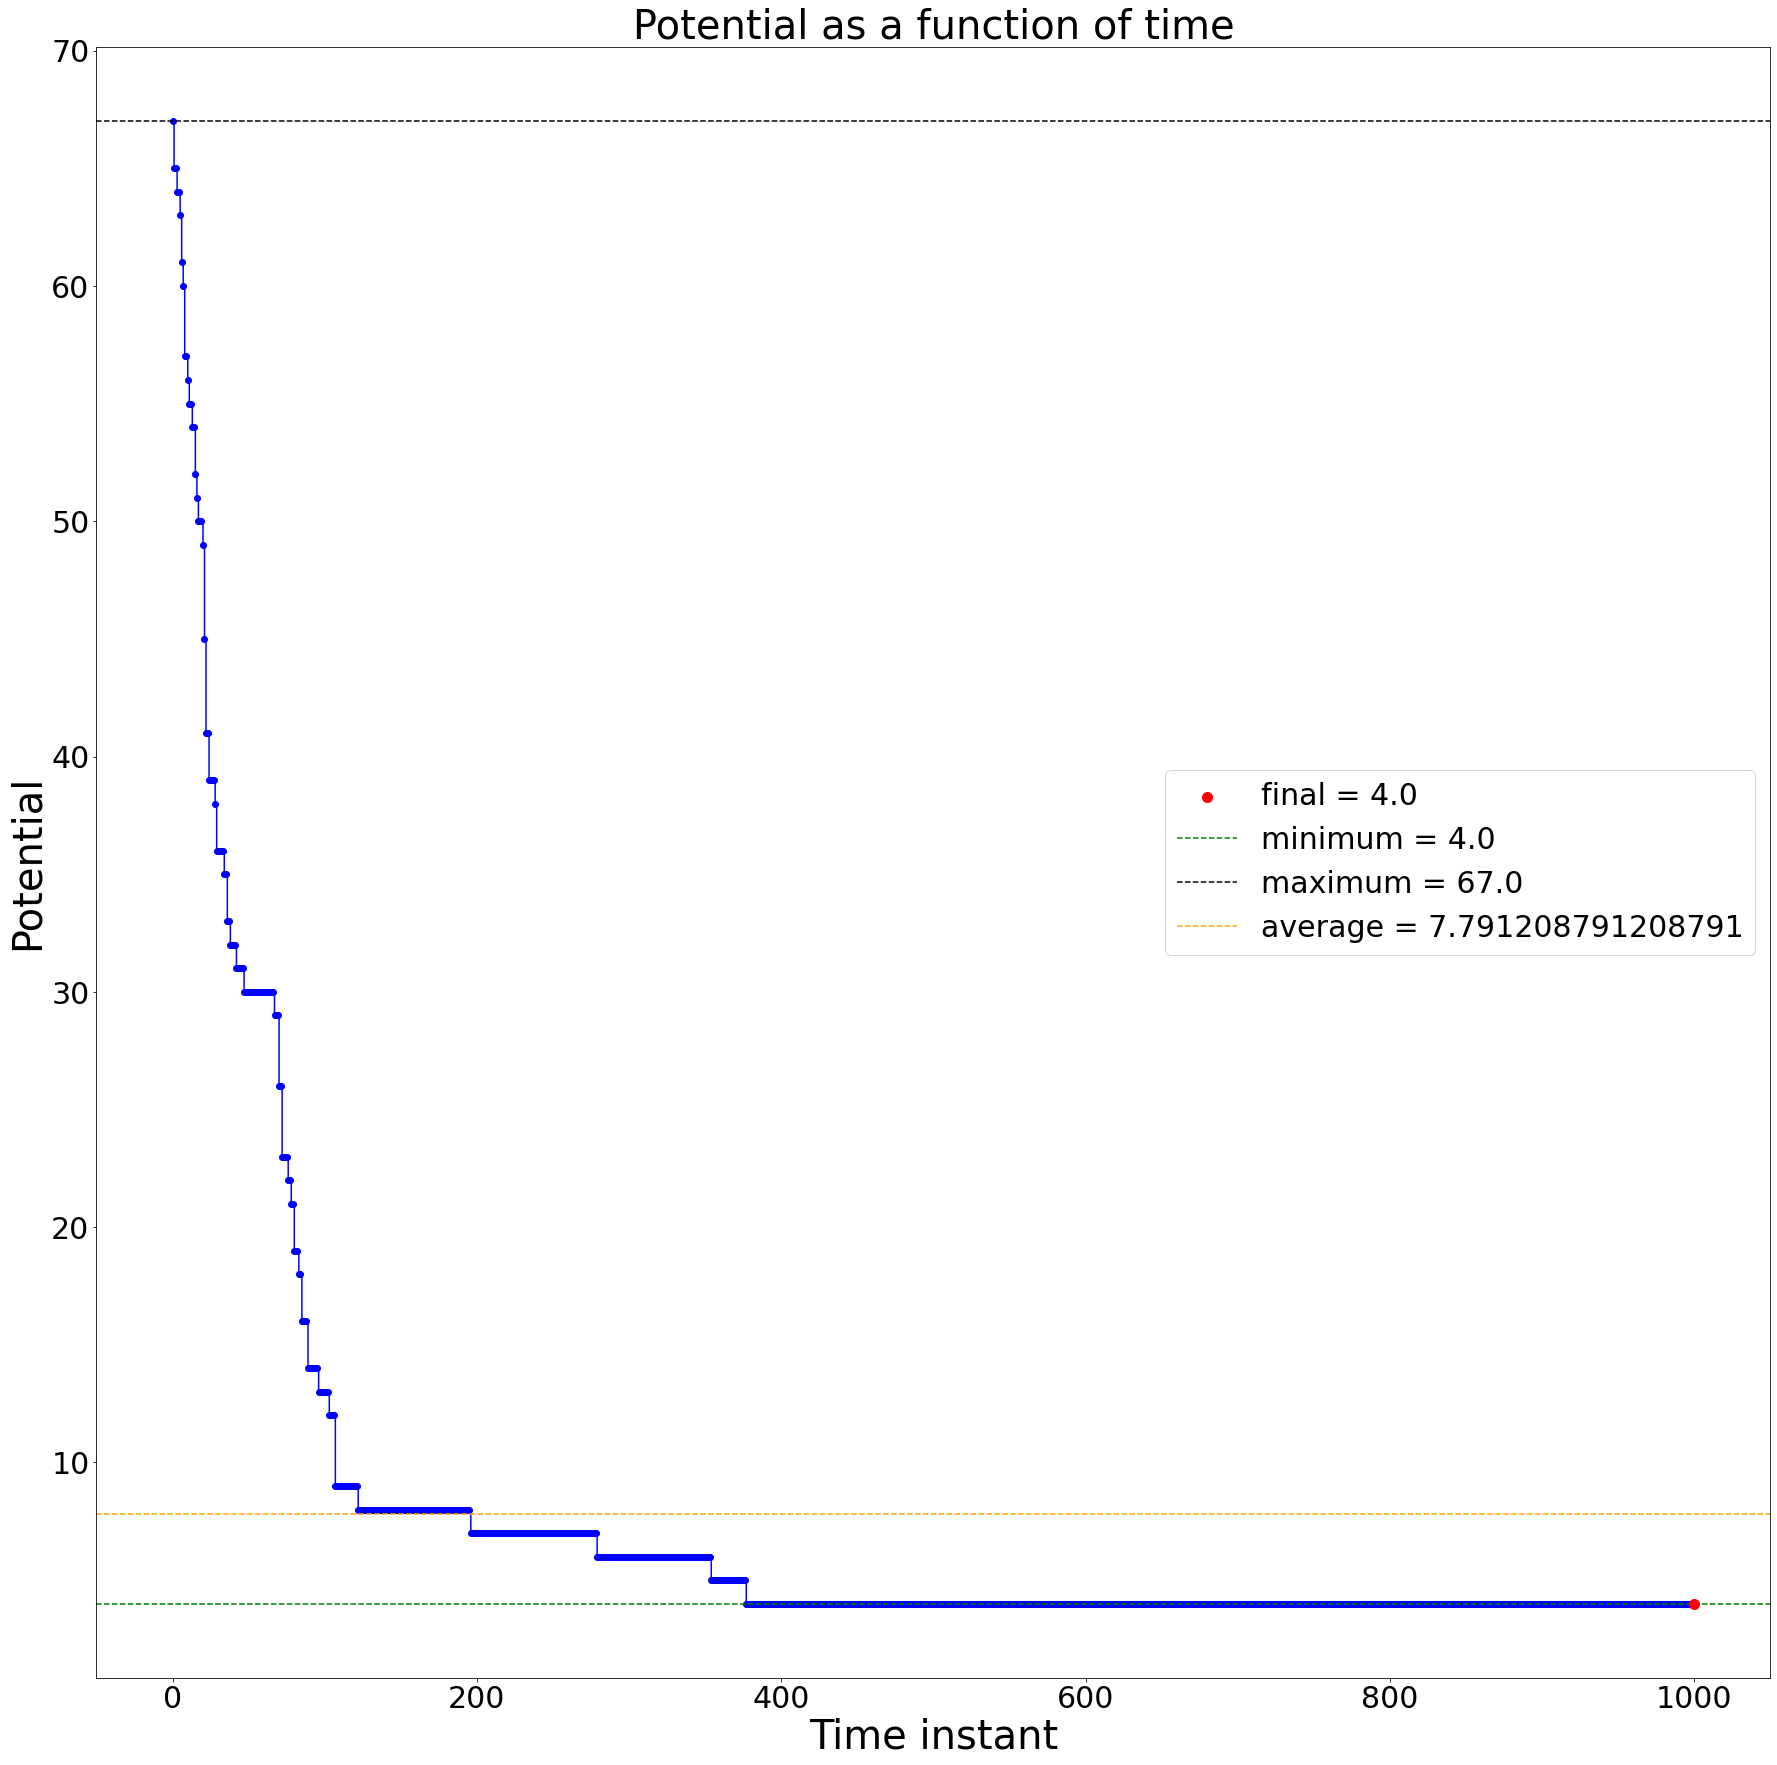

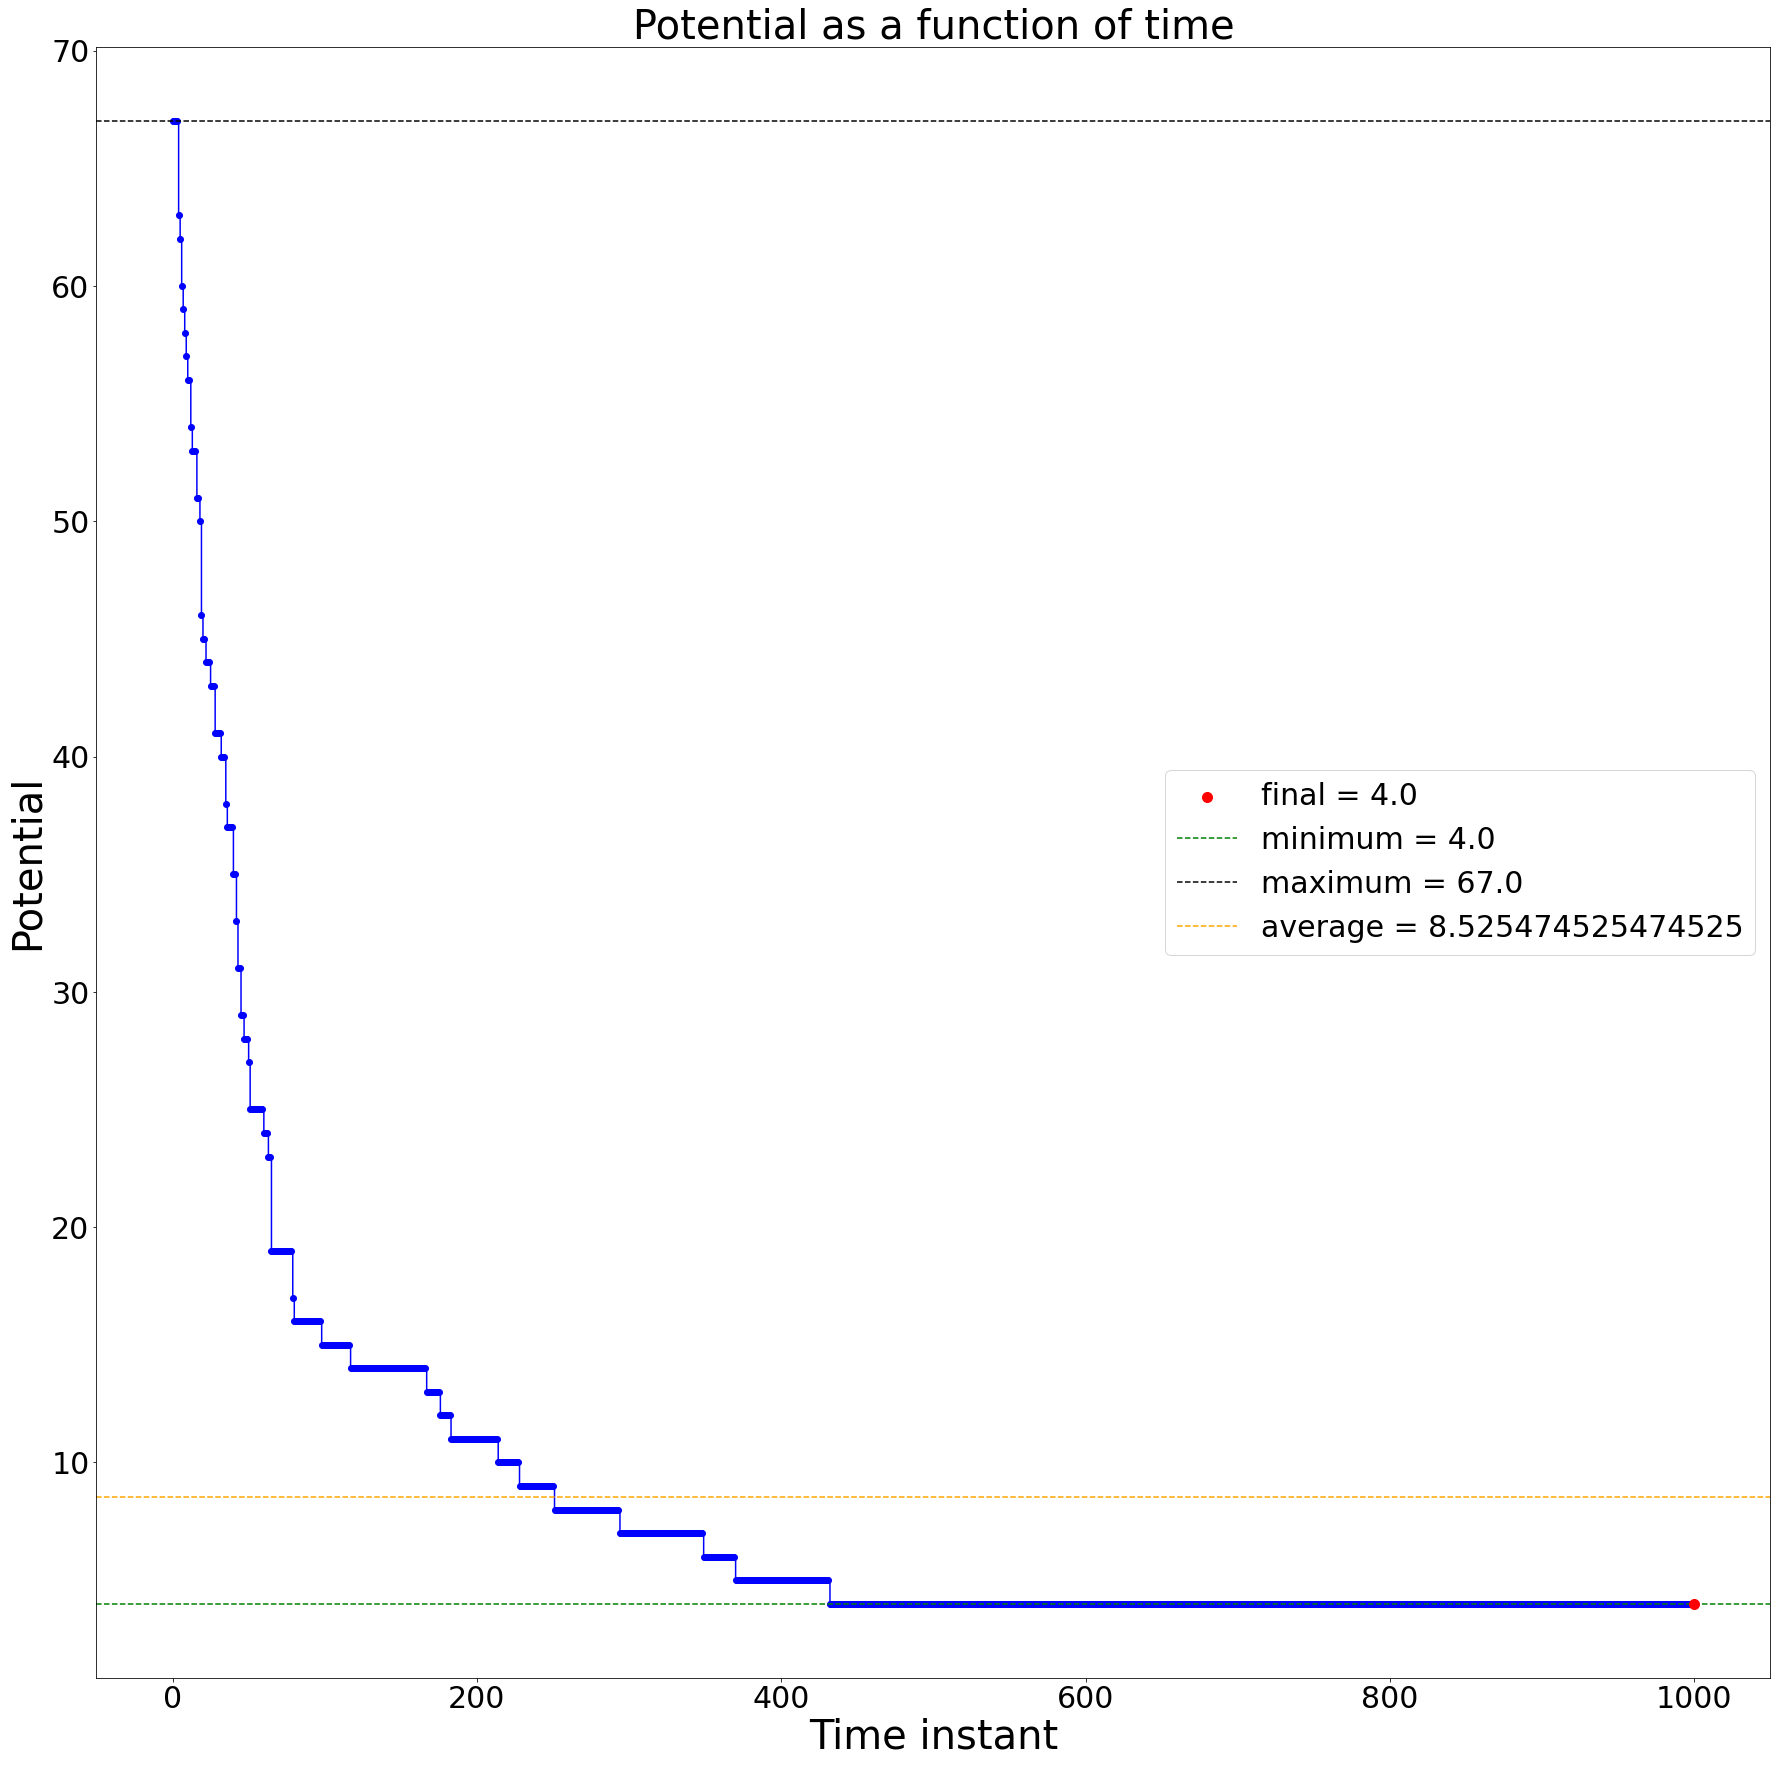

In [25]:
C_rev = dict((v,k) for k,v in C.items())
for eta in etas:
    printmd("Inverse noise $\eta(t) = " + eta()[1] + "$")
    states, t_final = simulate(C, W, initial_configuration, eta, cost, t_final = t_final, termination = 'time')

    potentials = []
    for t in range(0,t_final+1):
        x = states[t]
        pot = potential(x, W, cost)
        potentials.append(pot)

    fig = plt.figure(figsize=(30, 30))
    plt.step(potentials, 'bo-', where="post")
    last = potentials[-1]
    plt.scatter(x = t_final, y = last, color = 'r', zorder = 5, s = 100, label='final = ' + str(last))
    minimum = min(potentials)
    plt.axhline(y = minimum, color = 'g', linestyle = 'dashed', label='minimum = ' + str(minimum))
    maximum = max(potentials)
    plt.axhline(y = maximum, color = 'black', linestyle = 'dashed', label='maximum = ' + str(maximum))
    average = np.mean(np.mean(potentials))
    plt.axhline(y = average, color = 'orange', linestyle = 'dashed', label='average = ' + str(average))

    plt.title('Potential as a function of time', fontsize = 40)
    plt.xlabel('Time instant', fontsize = 40)
    plt.ylabel('Potential', fontsize = 40)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.legend(fontsize = 30)
    
    fig.savefig(img_dir + 'img ' + str(img_counter) + '.' + image_format, format=image_format)
    img_counter += 1
    
    print("\tFinal potential =", last)
    print("\tMinimum potential =", minimum)
    print("\tMaximum potential =", maximum)
    print("\tAvrage potential =", average)
    print("\n")